# Findings Summary



*   The dataset actually contained **12 futures-contract** `Symbols` with

    `FUT11` roughly missing a **third** of `Timestamp` and `Open Interest` values and **two-thirds** `Open`, `High`, `Low`, `Close`, `Volume`.
    
    `FUT12` rouhgly missing a **third** of `Timestamps` and `Open Interest`; **about 10%** in `Open`, `High`, `Low`, `Close` and `Volume`.



*   The other `Symbols` weren't missing as many values but `FUT7` and `FUT8` did have relatively higher levels of missingness.



* **Overall Missingness**: None in Symbol, about 8.9% in `Timestamp`; roughly 15% each in `Open`, `Close`, `High`, `Low`, `Close`, `Volume` and 10% in `Open Interest` Missingno **heatmaps** and **bar charts** helped quickly visualize not the missigness %age, but where exactly in the dataset missingness existed.


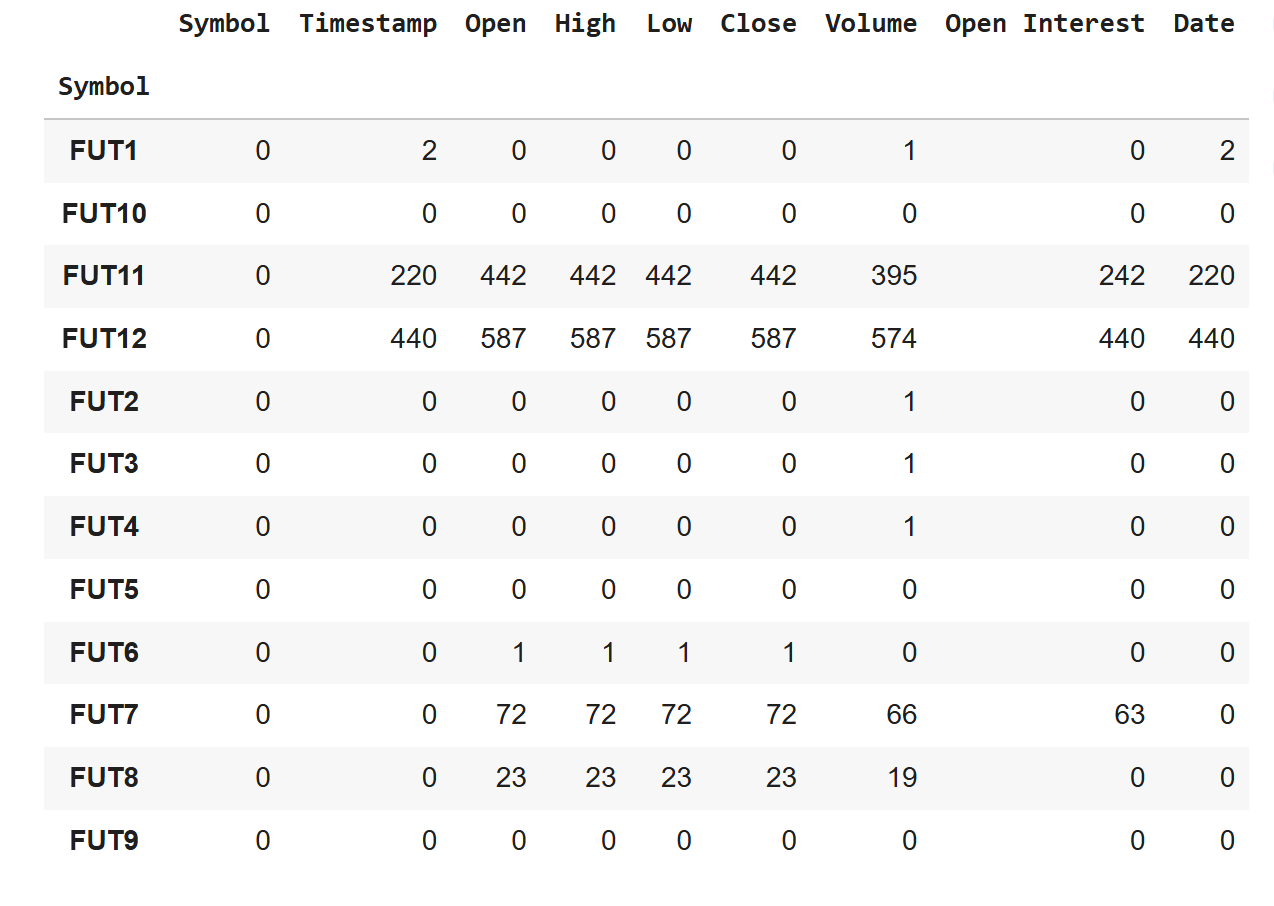


![image.png](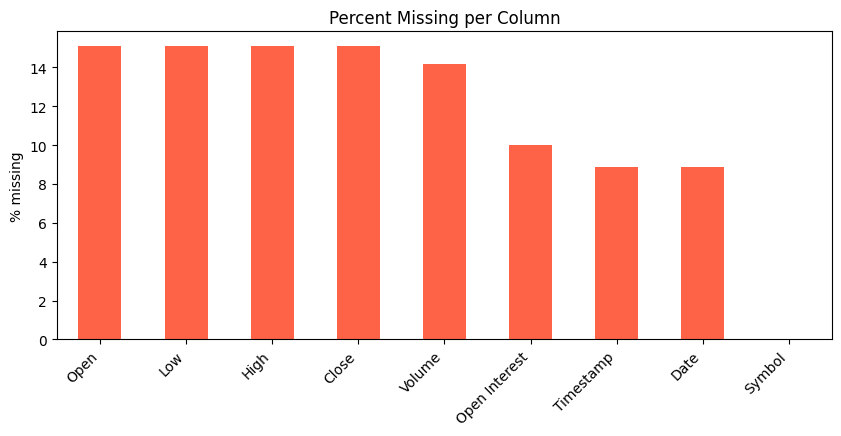
)




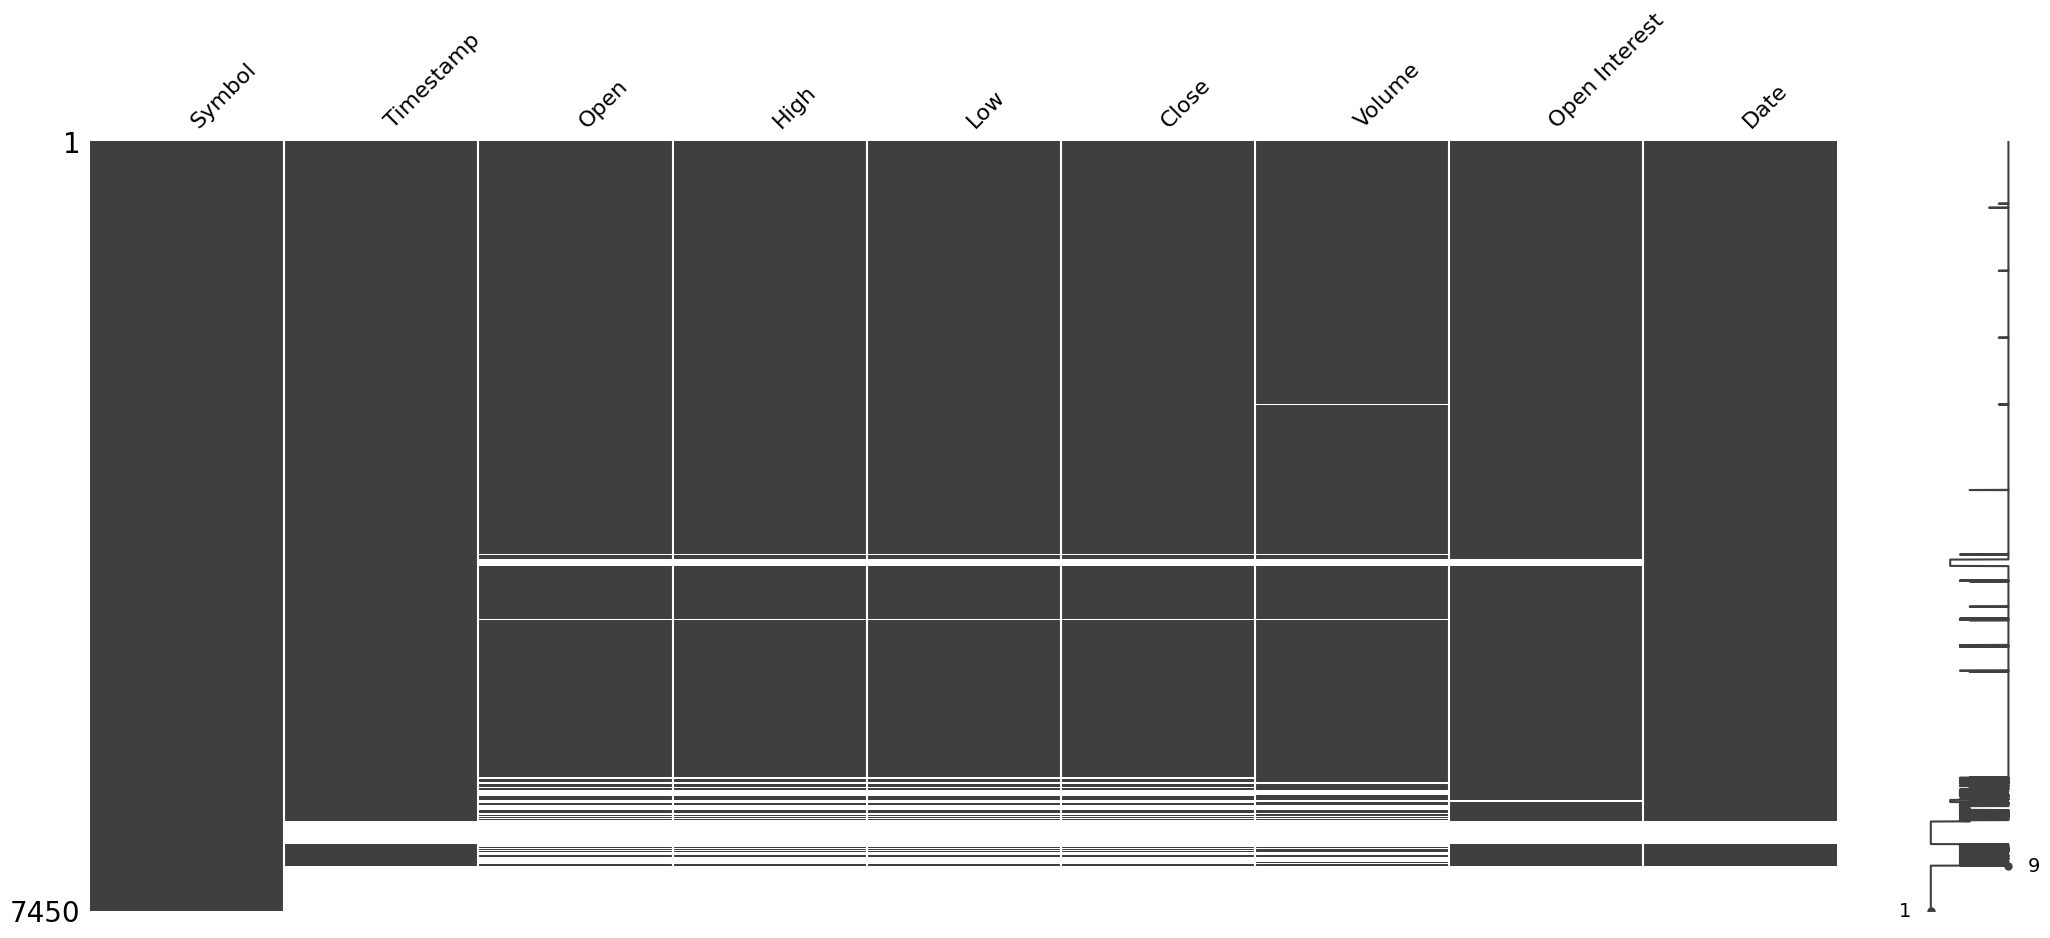



* The **very high** `std`, `min` and `max` values indicate the presence of huge outliers present in `Open`, `High`, `Low`, `Close`, `Volume` and `Open Interest`; heavy **right skewness** observed in **histograms** for numeric columns indicating a need for standardization for future modeling purposes (out of scope).





* **Negative values** within the matrix for `Open`, `High`, `Low`, `Close`, `Volume` and `Open Interest` also point to data integrity issues.



* There seemed to be a natural need to eliminate outliers (accounting for only "reasonable" values to better understand trends).




For column: Timestamp
Summary Stats: 
count     6788.000000
mean     45399.400707
std        273.809411
min      44929.000000
25%      45156.000000
50%      45398.000000
75%      45637.000000
max      45869.000000
Name: Timestamp, dtype: float64


Missingness: 
0.08885906040268457


Histogram:


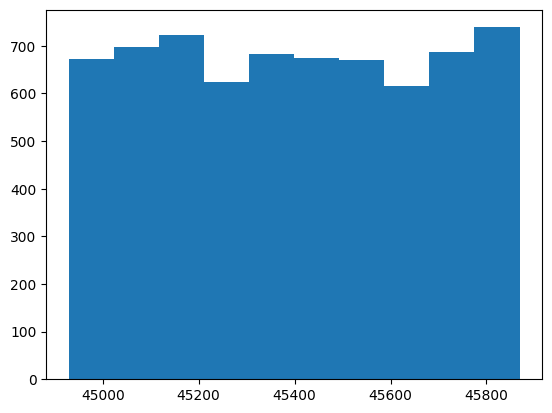




For column: Open
Summary Stats: 
count    6.325000e+03
mean    -6.325537e+16
std      6.887259e+18
min     -1.000000e+20
25%      8.020000e+01
50%      8.947500e+01
75%      1.001000e+02
max      1.000000e+20
Name: Open, dtype: float64


Missingness: 
0.15100671140939598


Histogram:


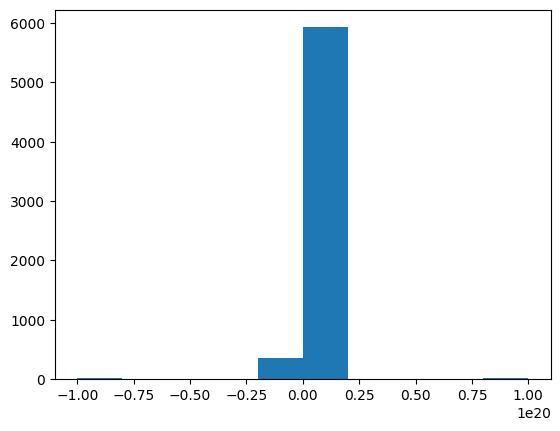




For column: Close
Summary Stats: 
count    6.325000e+03
mean    -1.119400e+14
std      7.546127e+18
min     -1.005687e+20
25%      8.007500e+01
50%      8.957500e+01
75%      1.003750e+02
max      1.000000e+20
Name: Close, dtype: float64


Missingness: 
0.15100671140939598


Histogram:


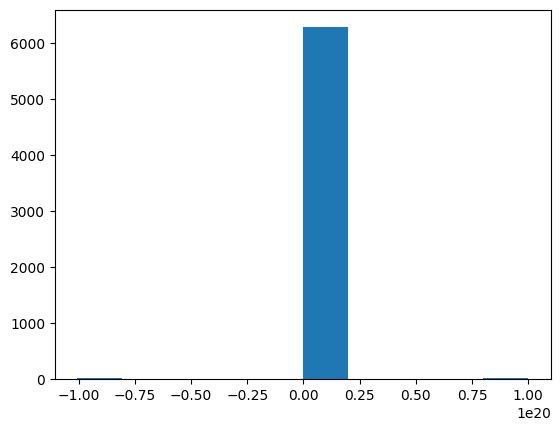




For column: High
Summary Stats: 
count    6.325000e+03
mean    -3.171391e+17
std      9.137840e+19
min     -5.345185e+21
25%      8.047500e+01
50%      9.000000e+01
75%      1.008500e+02
max      4.843482e+21
Name: High, dtype: float64


Missingness: 
0.15100671140939598


Histogram:


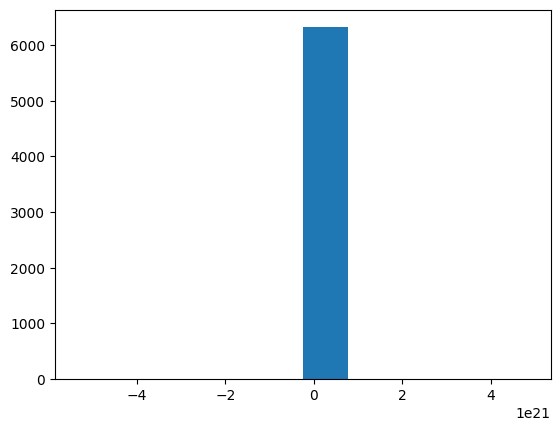




For column: Low
Summary Stats: 
count    6.325000e+03
mean    -1.484146e+18
std      9.144227e+19
min     -5.940167e+21
25%      7.950000e+01
50%      8.910000e+01
75%      9.977500e+01
max      1.000000e+20
Name: Low, dtype: float64


Missingness: 
0.15100671140939598


Histogram:


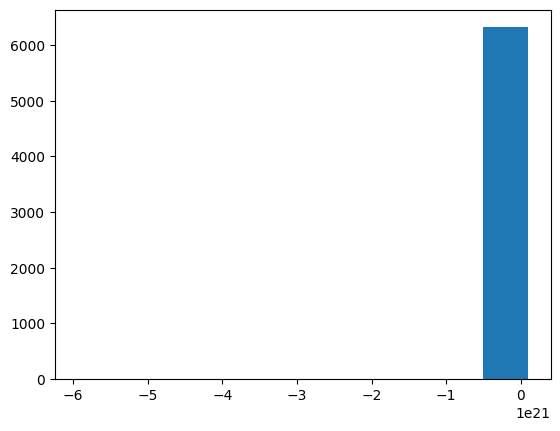




For column: Volume
Summary Stats: 
count    6.392000e+03
mean     1.095283e+17
std      7.608017e+18
min     -1.000000e+20
25%      7.000000e+01
50%      1.602500e+03
75%      7.658000e+03
max      1.000000e+20
Name: Volume, dtype: float64


Missingness: 
0.14201342281879195


Histogram:


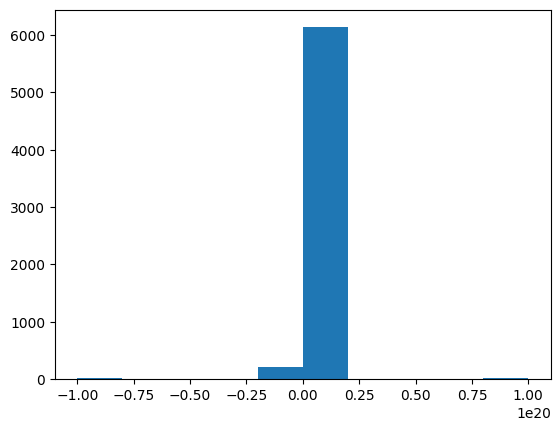




For column: Open Interest
Summary Stats: 
count    6.705000e+03
mean    -1.071223e+18
std      1.087493e+20
min     -8.882678e+21
25%      6.060000e+02
50%      8.804632e+03
75%      3.582800e+04
max      1.000000e+20
Name: Open Interest, dtype: float64


Missingness: 
0.1


Histogram:


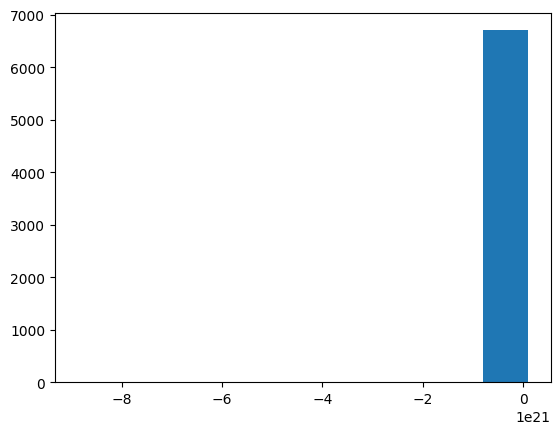

  #### Looking for "Logical Integrity" and "Reasonable" Values


  * The `Timestamp` column presents a healthy and reasomable spread of data. However, that wasn't the case with the other numeric columns.

  * Extracting numeric values between the 10th and 90th percentile for `Open`, `High`, `Low`, `Close`, `Volume` and `Open Interest` aimed to flag/capture as many "viable" values as possible.

  * The histograms pointed to how "closely packed" most of the values are so this assumption may be healthy.


  **Note:** :

  1) The 10-90 range was determined via trial and error, further expanding the bounds would lead to including some abnormally large values.


  ##### "logical" entries were based on these principles:

  1) **Low <= Open/Close <= High**             
  2) **Volume/Open Interest > 0**



  **Important Assumption**

  During my trading experience, I have come across some situations where some obscure securities/options have zero `Volume` and `Open Interest`, but for the purposes of this assessment, I considered only positive `Volume` / `Open Interest` to be logical.



**Key Observations**


1) There are high instances of data integrity issues - out of 7450 rows, only 3334 rows are "logical" following our 2 rule constraints of Low <= Open/Close <= High and Volume/Open Interest > 0.

This was a significant but necessary reduction because including these would clearly point to data integrity issues.

2) Of the 3334 rows that were "logical", we adopt a 10-90 percentile range - any numerical value outside this range for `Open`, `Close`, `Low`, `High`, `Open Interest` and `Volume` count as outliers.

This left us with **1745** "logical" rows with "non-outlier" values throuhgout.




#### Pairplots and Correlations


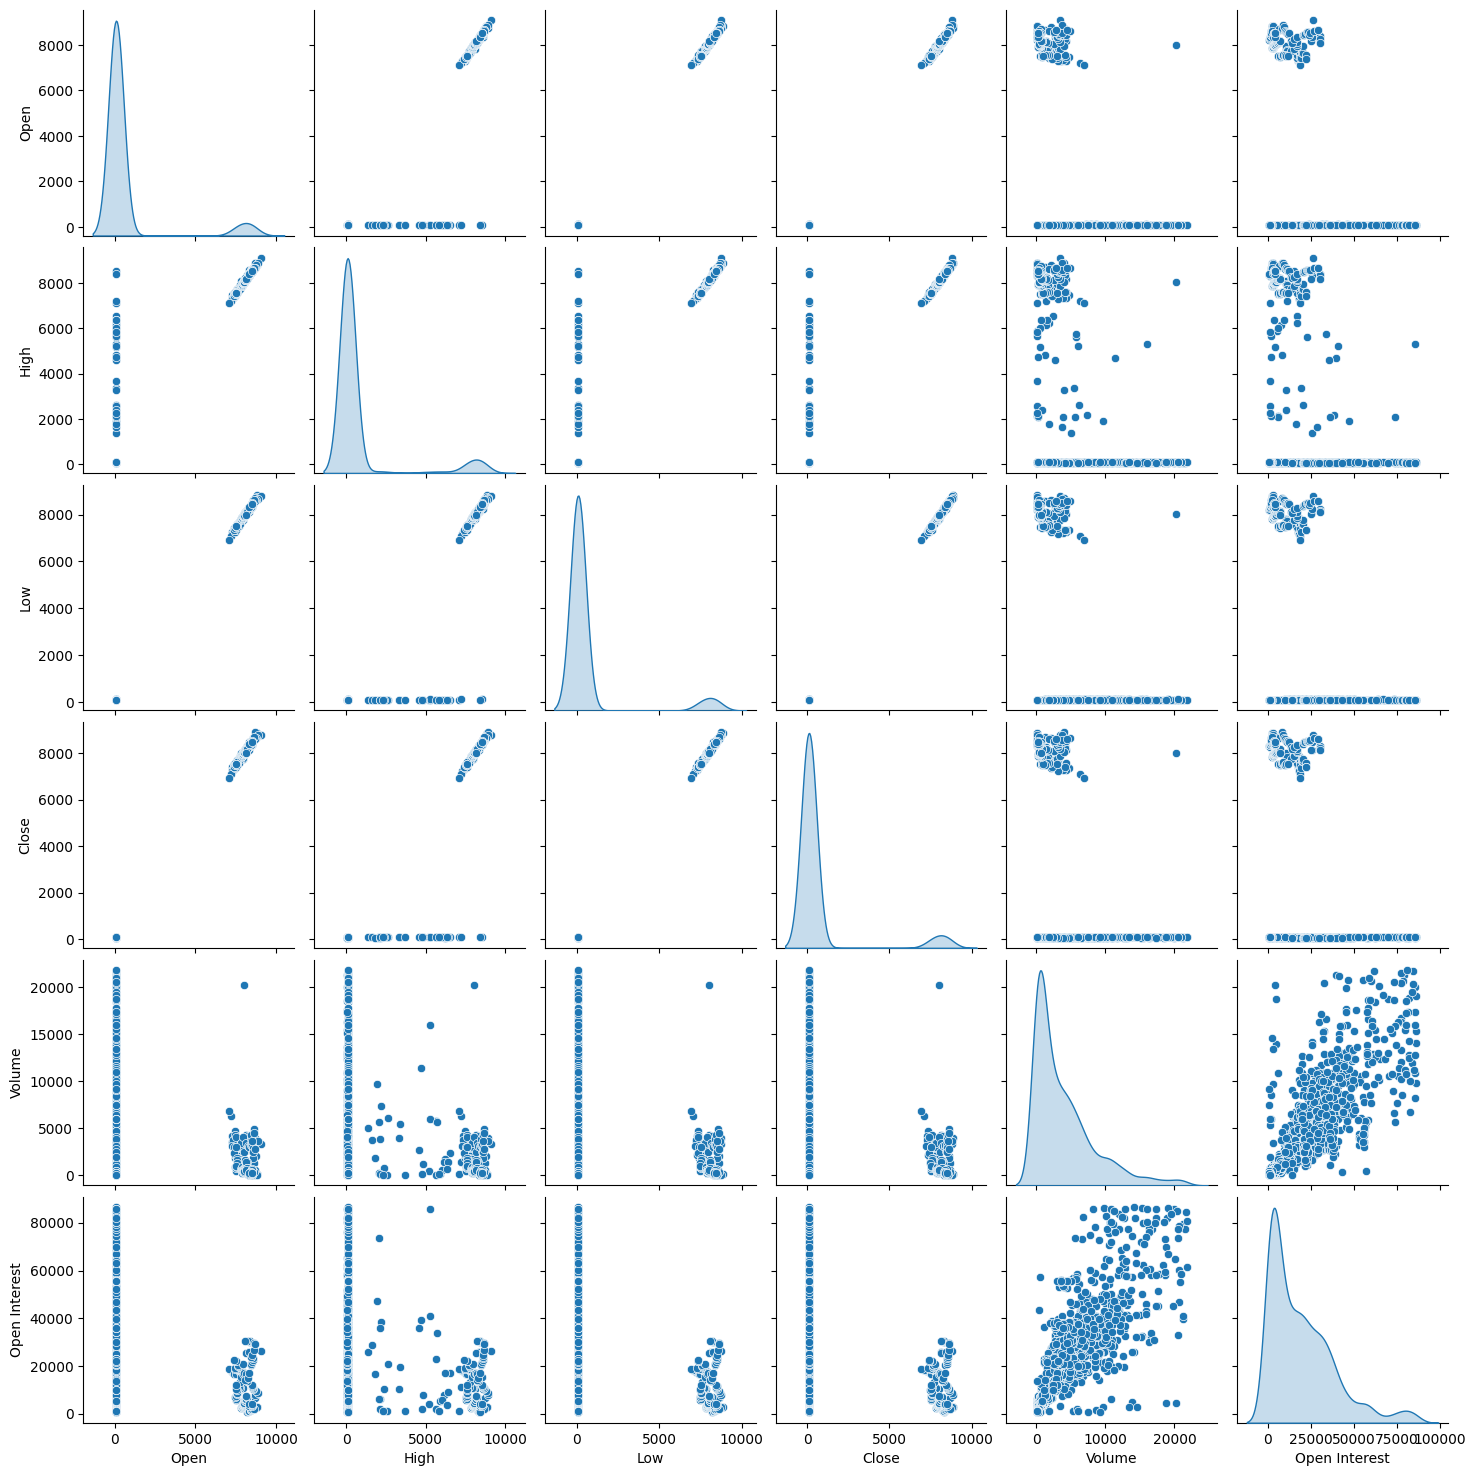




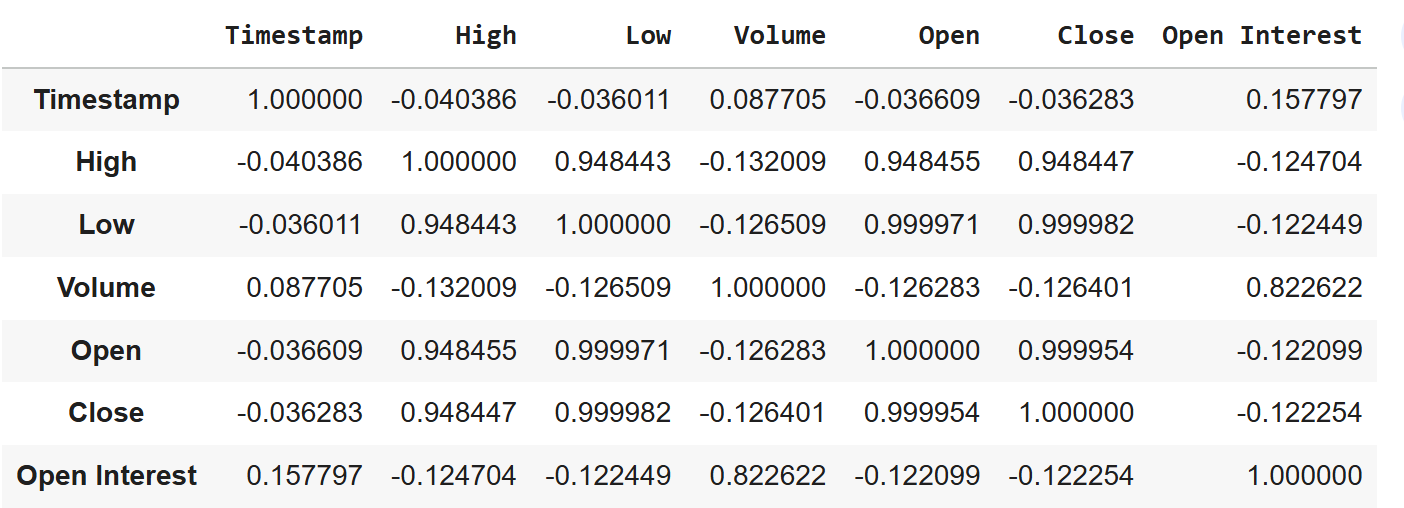

### Observation

Understandably, we see a strong positive correlations between numerical columns due to high time-series **"auto-correlation"** but `Open Interest` and `Volume` have a fairly significant positive correlation.

This is outside scope but **ARIMA** and **LSTMs** models could do great to track seasonality and price action across `Symbols`

## Ticker-Wise Results

The summary stats and visualizations below show how "logical" and "non-outlier" transformations have made the data more coherent to work with. Generally, distributions for each ticker demonstrate a lot less strong skewness than earlier and the data can now be standardized/modeled better for downstream processes.


Ticker: FUT1

For column: Open
Summary Stats: 
count    188.000000
mean      85.379388
std        7.252485
min       72.600000
25%       80.000000
50%       84.887500
75%       89.431250
max      102.125000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


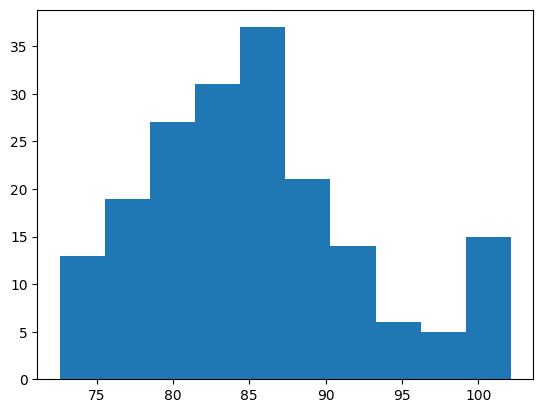




For column: High
Summary Stats: 
count    188.000000
mean      86.074601
std        7.277717
min       73.900000
25%       80.787500
50%       85.350000
75%       89.862500
max      102.700000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


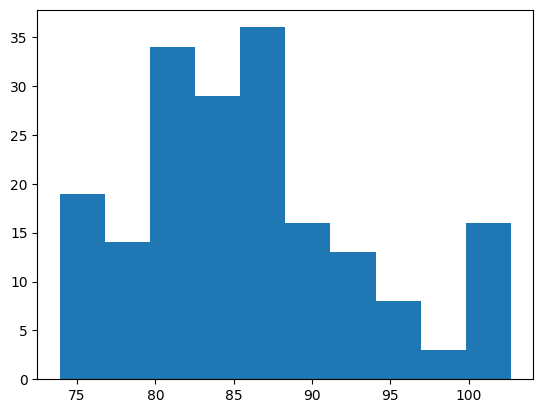




For column: Low
Summary Stats: 
count    188.000000
mean      84.777394
std        7.281494
min       72.500000
25%       79.375000
50%       83.937500
75%       88.987500
max      101.775000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


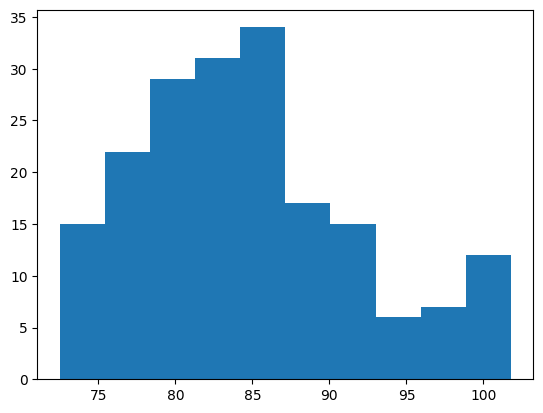




For column: Close
Summary Stats: 
count    188.000000
mean      85.403324
std        7.314532
min       73.500000
25%       79.975000
50%       84.550000
75%       89.437500
max      102.600000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


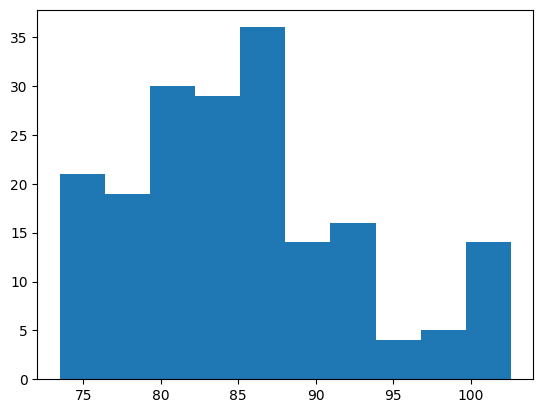




For column: Volume
Summary Stats: 
count      188.000000
mean     12580.148936
std       8204.263730
min        853.000000
25%       6098.250000
50%      10170.000000
75%      19051.000000
max      32213.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


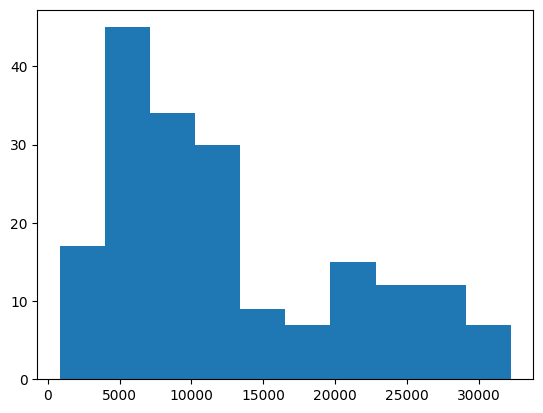




For column: Open Interest
Summary Stats: 
count       188.000000
mean      37337.122340
std       24303.616605
min        4268.000000
25%       19691.000000
50%       29503.000000
75%       46961.500000
max      102184.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


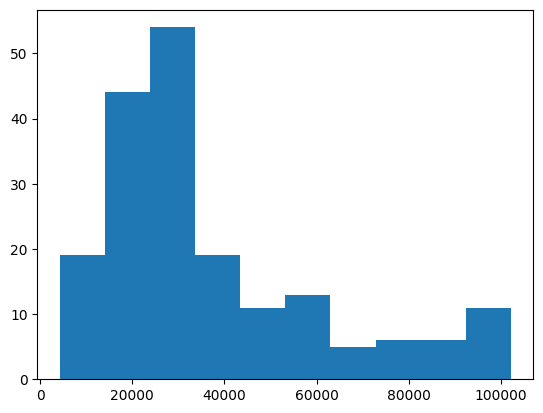




Ticker: FUT2

For column: Open
Summary Stats: 
count    171.000000
mean      86.441667
std        8.183064
min       72.625000
25%       80.850000
50%       86.100000
75%       90.712500
max      107.425000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


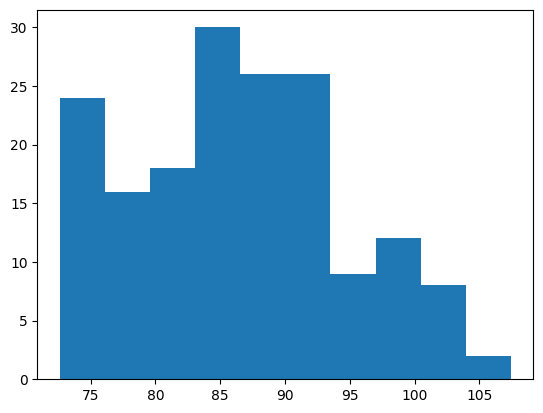




For column: High
Summary Stats: 
count     171.000000
mean      105.259418
std       172.935251
min        73.950000
25%        81.700000
50%        87.450000
75%        91.800000
max      2085.880488
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


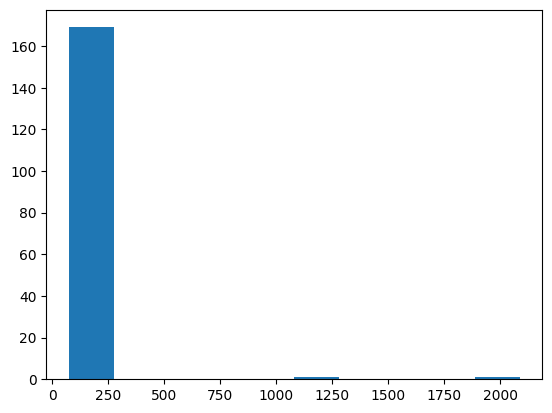




For column: Low
Summary Stats: 
count    171.000000
mean      85.518275
std        8.068975
min       72.425000
25%       80.125000
50%       85.625000
75%       90.075000
max      105.700000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


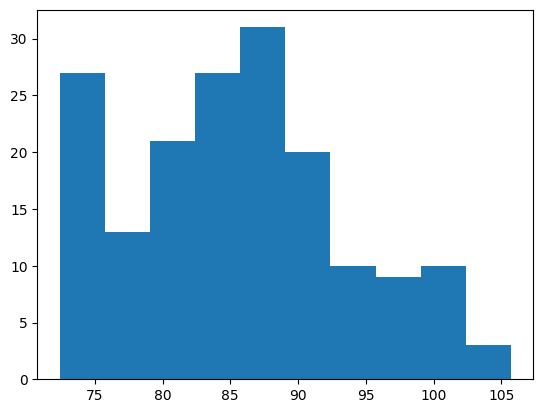




For column: Close
Summary Stats: 
count    171.000000
mean      86.449854
std        8.046798
min       73.375000
25%       81.100000
50%       86.350000
75%       90.750000
max      106.050000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


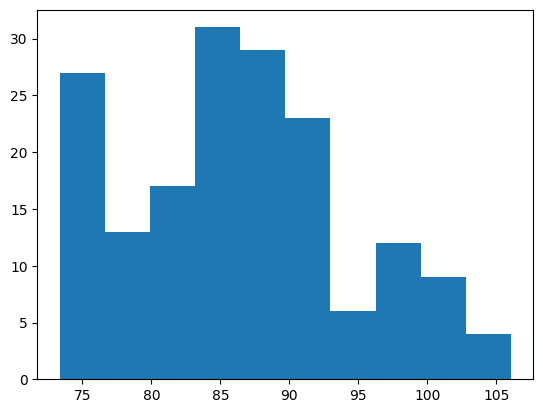




For column: Volume
Summary Stats: 
count      171.000000
mean     16613.934162
std       9259.272455
min        277.000000
25%      12157.000000
50%      18716.000000
75%      23250.000000
max      31973.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


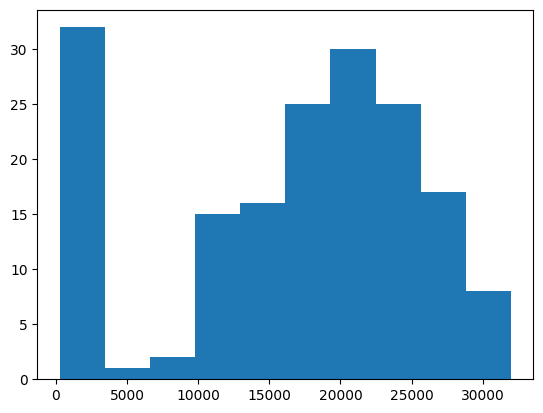




For column: Open Interest
Summary Stats: 
count       171.000000
mean      71563.892293
std       36148.848705
min        4148.000000
25%       56682.500000
50%       84955.000000
75%       96802.000000
max      122955.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


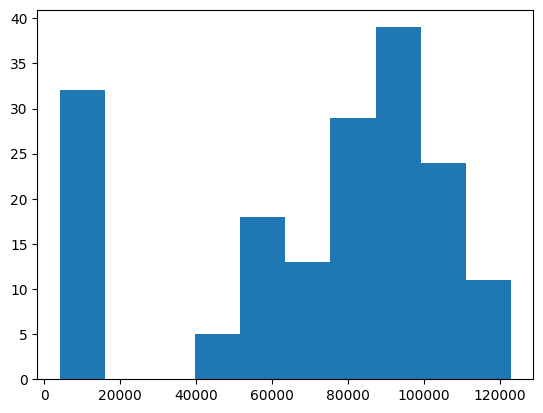




Ticker: FUT3

For column: Open
Summary Stats: 
count      168.000000
mean       845.131399
std       6894.507181
min         76.350000
25%         81.706250
50%         90.837500
75%         99.450000
max      64425.000000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


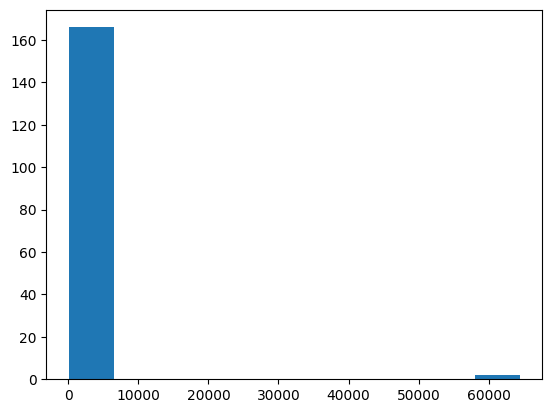




For column: High
Summary Stats: 
count      168.000000
mean       980.170624
std       7107.969387
min         77.225000
25%         82.768750
50%         92.462500
75%        101.006250
max      65925.000000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


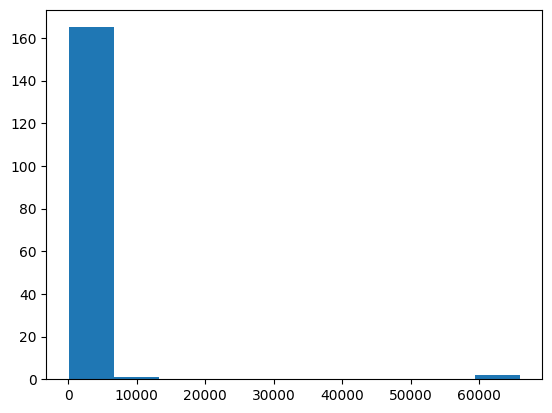




For column: Low
Summary Stats: 
count      168.000000
mean       843.751339
std       6889.073586
min         75.675000
25%         80.562500
50%         90.000000
75%         98.675000
max      64325.000000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


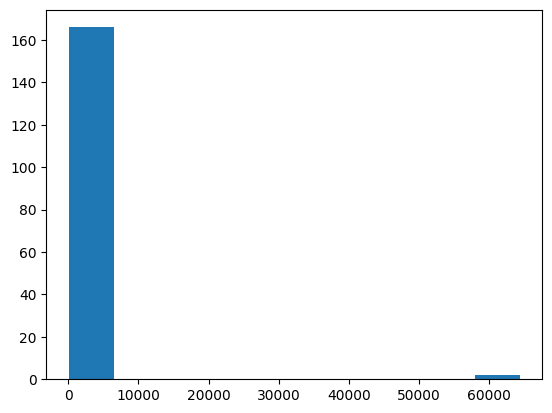




For column: Close
Summary Stats: 
count      168.000000
mean       863.028720
std       7057.396818
min         76.175000
25%         81.631250
50%         90.925000
75%         99.556250
max      65750.000000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


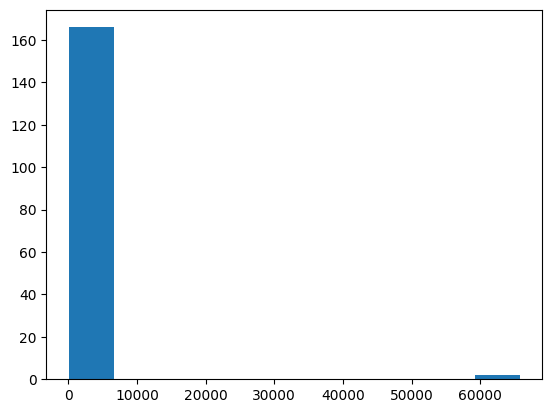




For column: Volume
Summary Stats: 
count      168.000000
mean     10825.811819
std       6677.136549
min        138.000000
25%       6460.750000
50%      10334.500000
75%      15441.250000
max      25458.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


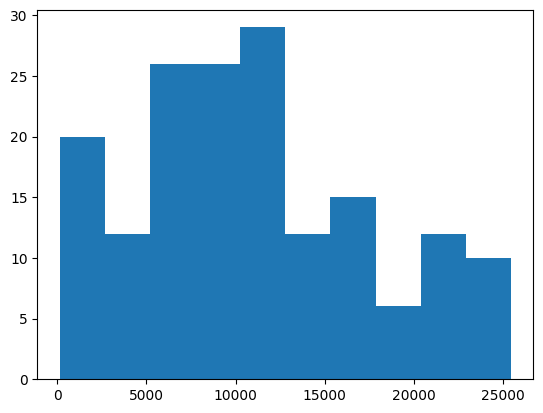




For column: Open Interest
Summary Stats: 
count      168.000000
mean     50585.184524
std      25755.451791
min       1932.000000
25%      36639.000000
50%      48113.500000
75%      70185.500000
max      93683.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


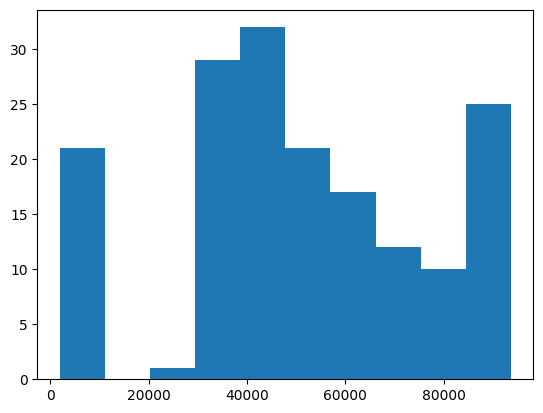




Ticker: FUT4

For column: Open
Summary Stats: 
count     174.000000
mean      690.078017
std      2313.740000
min        75.725000
25%        82.262500
50%        91.987500
75%       102.618750
max      9875.000000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


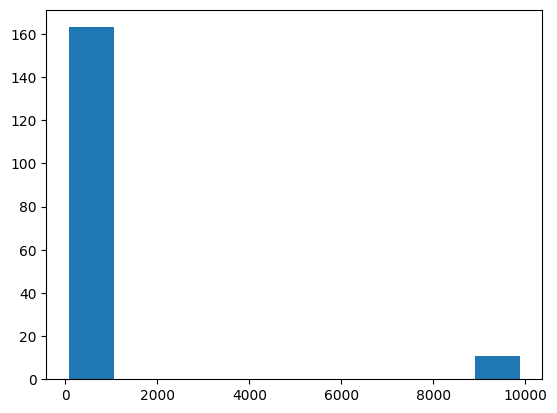




For column: High
Summary Stats: 
count     174.000000
mean      823.161120
std      2454.756045
min        77.400000
25%        83.256250
50%        92.787500
75%       103.525000
max      9932.500000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


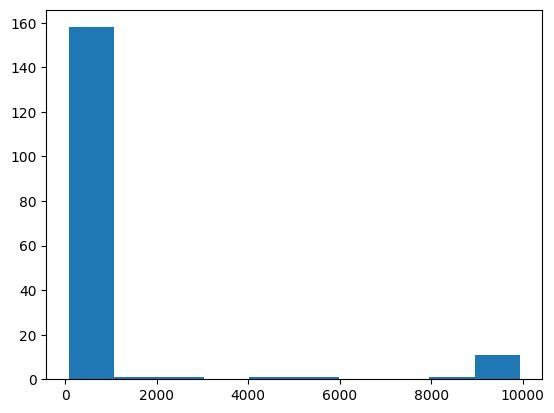




For column: Low
Summary Stats: 
count     174.000000
mean      683.222126
std      2289.801899
min        75.500000
25%        81.625000
50%        91.112500
75%       101.337500
max      9797.500000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


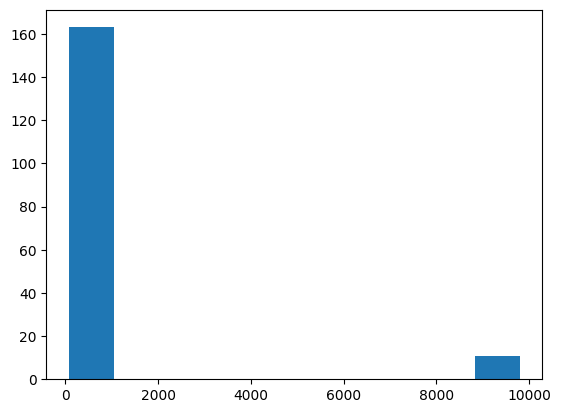




For column: Close
Summary Stats: 
count     174.000000
mean      690.392529
std      2314.537211
min        76.275000
25%        82.400000
50%        91.675000
75%       102.056250
max      9907.500000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


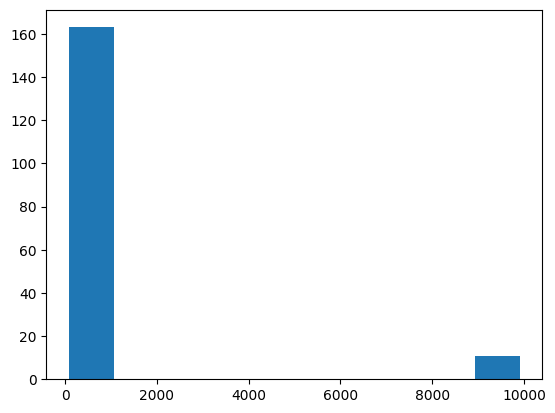




For column: Volume
Summary Stats: 
count      174.000000
mean      5977.282075
std       2864.323520
min         88.000000
25%       4157.750000
50%       5790.500000
75%       7833.750000
max      12702.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


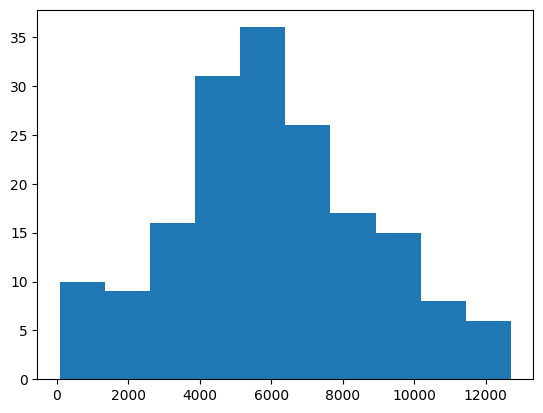




For column: Open Interest
Summary Stats: 
count      174.000000
mean     30163.591954
std      11792.290603
min       3206.000000
25%      23046.000000
50%      30064.500000
75%      37237.000000
max      57969.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


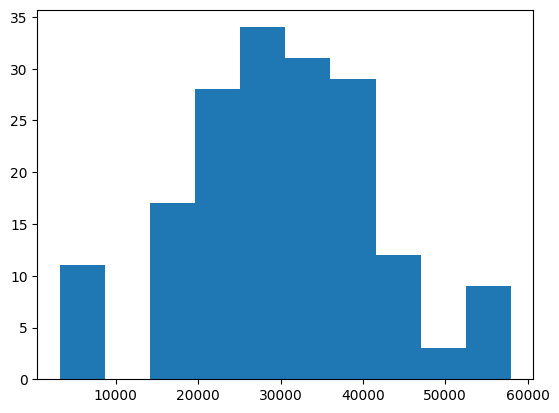




Ticker: FUT5

For column: Open
Summary Stats: 
count     201.000000
mean     1036.853980
std      2504.452383
min        80.375000
25%        93.025000
50%        99.125000
75%       104.525000
max      8430.000000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


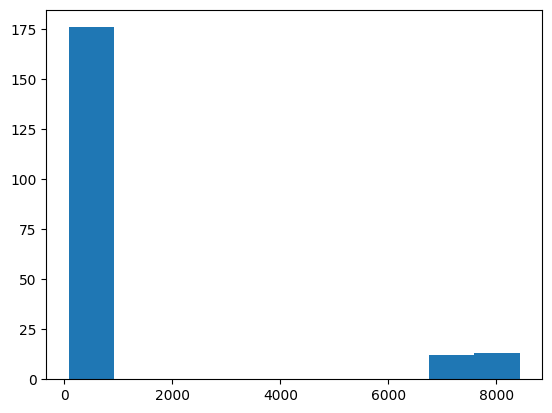




For column: High
Summary Stats: 
count     201.000000
mean     1206.850046
std      2619.776456
min        81.650000
25%        93.725000
50%       100.575000
75%       105.350000
max      8452.500000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


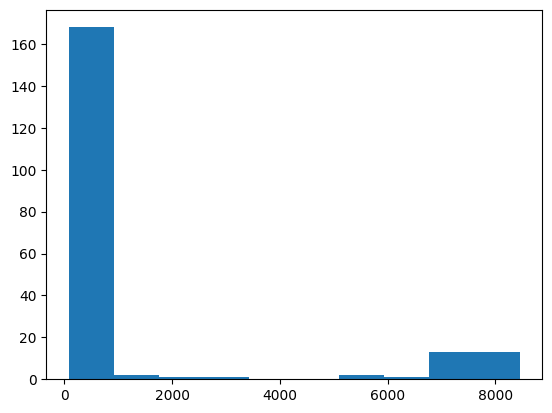




For column: Low
Summary Stats: 
count     201.000000
mean     1027.819900
std      2482.915244
min        79.650000
25%        92.450000
50%        98.900000
75%       103.475000
max      8367.500000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


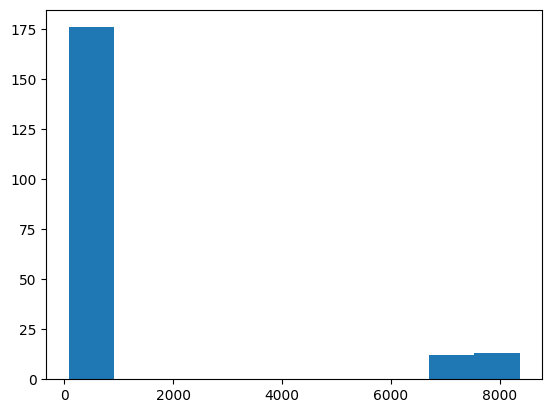




For column: Close
Summary Stats: 
count     201.000000
mean     1035.656343
std      2501.769611
min        80.275000
25%        92.875000
50%        99.450000
75%       104.100000
max      8410.000000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


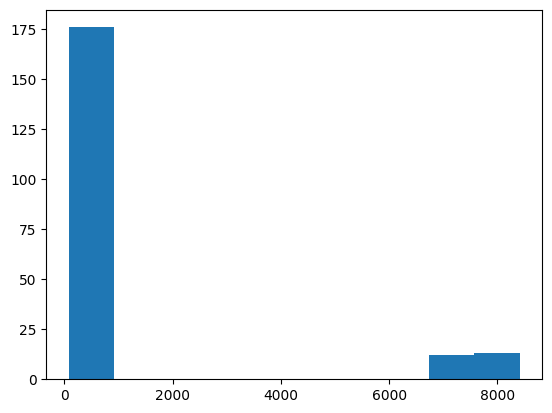




For column: Volume
Summary Stats: 
count     201.000000
mean     4030.671642
std      1908.034798
min        47.000000
25%      2489.000000
50%      3993.000000
75%      5594.000000
max      7917.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


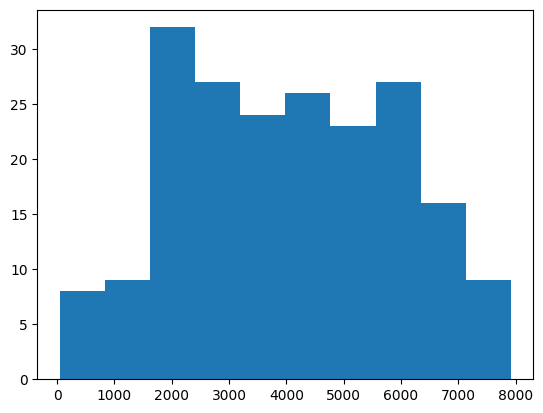




For column: Open Interest
Summary Stats: 
count      201.000000
mean     22284.348259
std       9464.663266
min       1100.000000
25%      16033.000000
50%      21658.000000
75%      29635.000000
max      43168.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


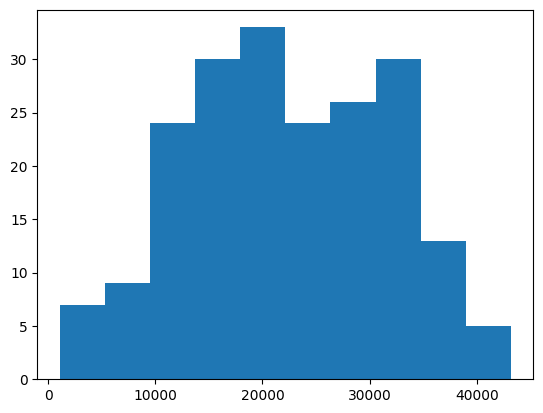




Ticker: FUT6

For column: Open
Summary Stats: 
count     203.000000
mean      858.881527
std      2322.300750
min        79.475000
25%        90.112500
50%        95.000000
75%       100.500000
max      8307.500000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


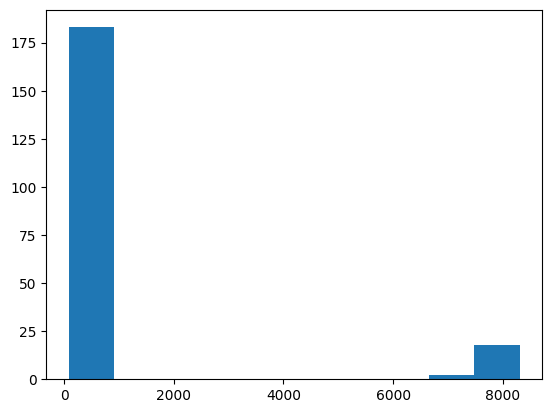




For column: High
Summary Stats: 
count     203.000000
mean      888.036374
std      2355.778701
min        79.525000
25%        90.812500
50%        95.650000
75%       101.162500
max      8335.000000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


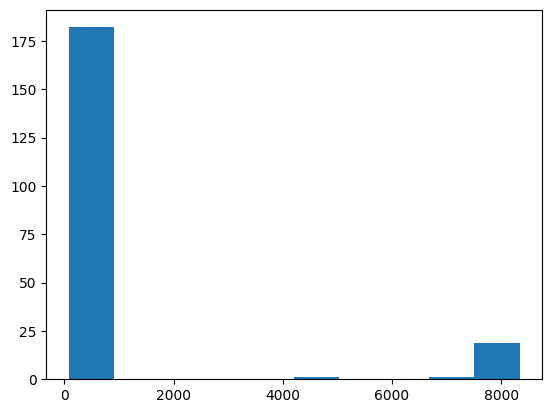




For column: Low
Summary Stats: 
count     203.000000
mean      848.462685
std      2292.685202
min        77.950000
25%        89.162500
50%        94.600000
75%        99.700000
max      8177.500000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


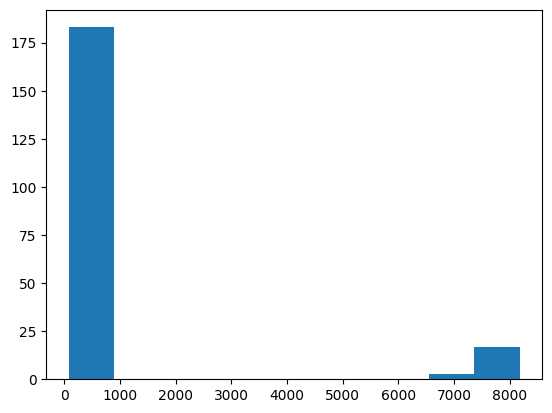




For column: Close
Summary Stats: 
count     203.000000
mean      857.283251
std      2317.563126
min        78.300000
25%        89.912500
50%        94.975000
75%       100.537500
max      8210.000000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


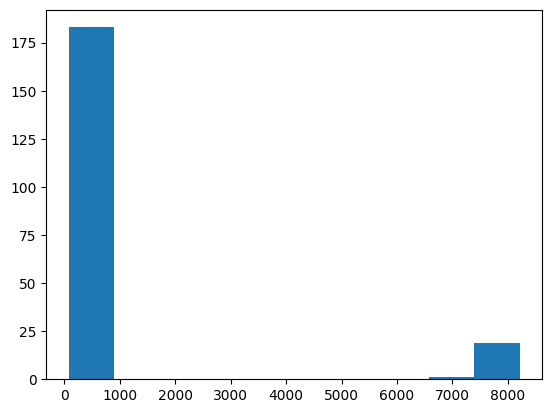




For column: Volume
Summary Stats: 
count     203.000000
mean     2867.458128
std      1341.438024
min       195.000000
25%      1809.000000
50%      2581.000000
75%      4030.500000
max      5582.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


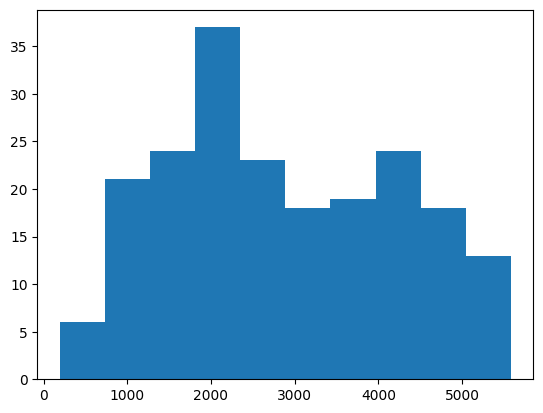




For column: Open Interest
Summary Stats: 
count      203.000000
mean     18601.645320
std       7346.356823
min        972.000000
25%      12972.500000
50%      18442.000000
75%      23036.000000
max      37489.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


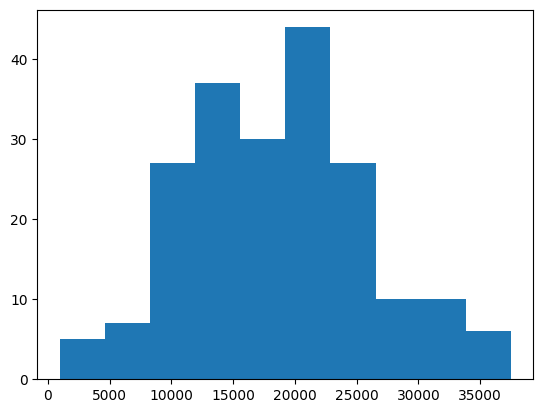




Ticker: FUT7

For column: Open
Summary Stats: 
count     153.000000
mean      519.719118
std      1850.969983
min        77.200000
25%        81.925000
50%        85.375000
75%        92.200000
max      8565.000000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


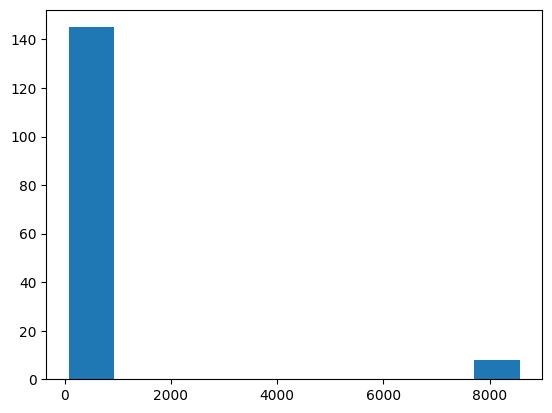




For column: High
Summary Stats: 
count     153.000000
mean      618.267087
std      1976.458626
min        77.575000
25%        82.400000
50%        86.125000
75%        92.925000
max      8577.500000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


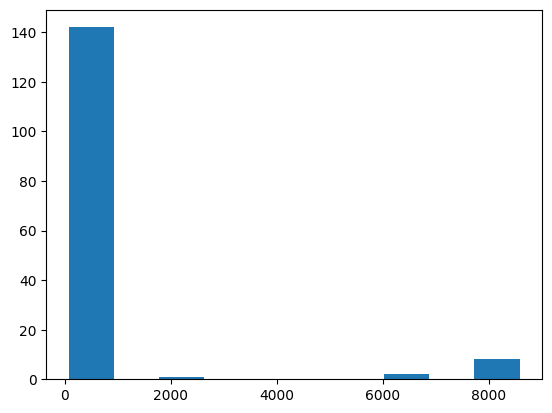




For column: Low
Summary Stats: 
count     153.000000
mean      516.689216
std      1840.380020
min        76.700000
25%        81.225000
50%        84.975000
75%        91.450000
max      8512.500000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


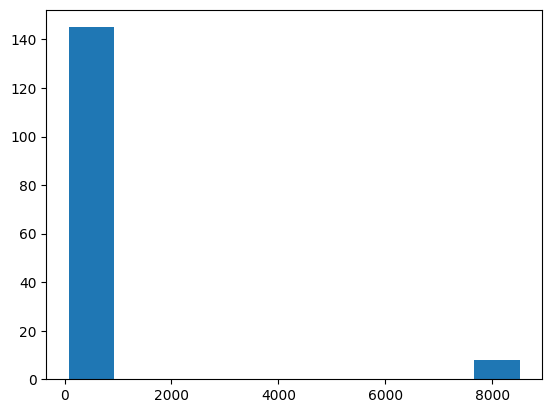




For column: Close
Summary Stats: 
count     153.000000
mean      520.024020
std      1852.059421
min        77.400000
25%        81.775000
50%        85.525000
75%        92.350000
max      8535.000000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


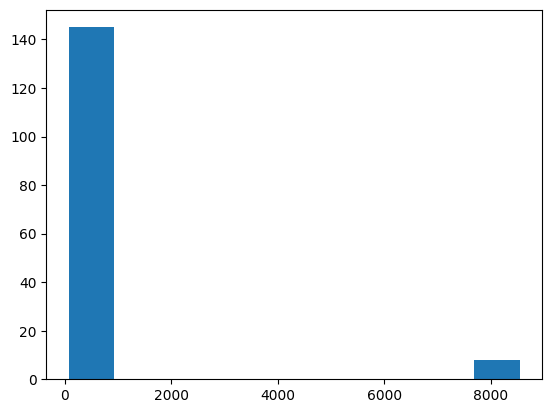




For column: Volume
Summary Stats: 
count     153.000000
mean     1388.803922
std       831.964994
min       164.000000
25%       719.000000
50%      1267.000000
75%      1964.000000
max      3585.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


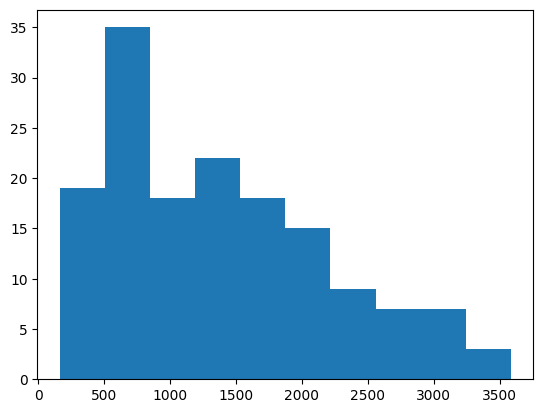




For column: Open Interest
Summary Stats: 
count      153.000000
mean      9943.849673
std       5305.673140
min        882.000000
25%       5688.000000
50%       8717.000000
75%      13652.000000
max      23420.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


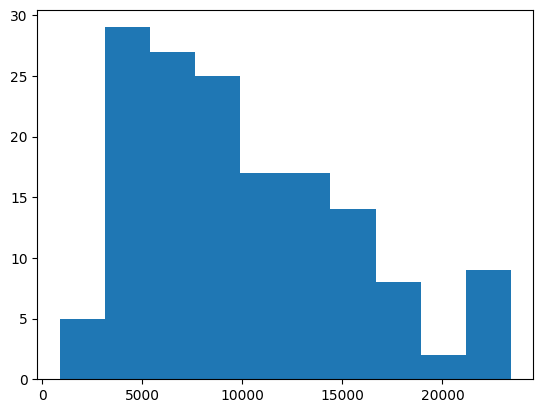




Ticker: FUT8

For column: Open
Summary Stats: 
count     185.000000
mean     2138.103649
std      3588.022686
min        76.225000
25%        83.225000
50%        91.450000
75%        98.550000
max      9610.000000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


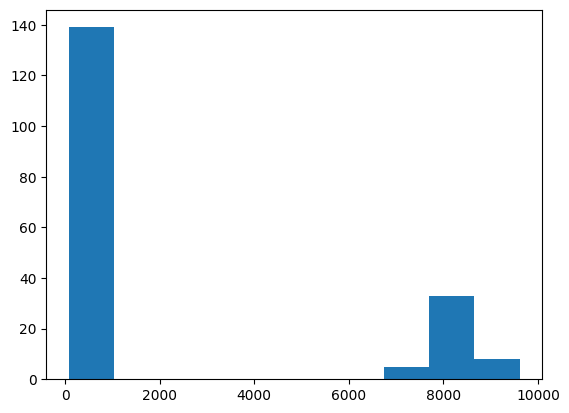




For column: High
Summary Stats: 
count     185.000000
mean     2258.178983
std      3630.201086
min        76.375000
25%        83.850000
50%        91.875000
75%      7515.000000
max      9655.000000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


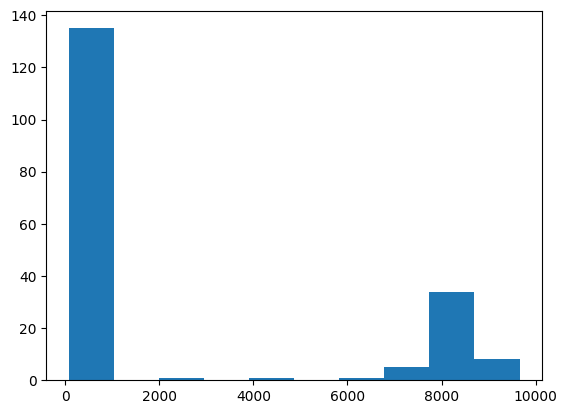




For column: Low
Summary Stats: 
count     185.000000
mean     2124.481757
std      3564.360918
min        75.800000
25%        82.525000
50%        90.750000
75%        97.725000
max      9510.000000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


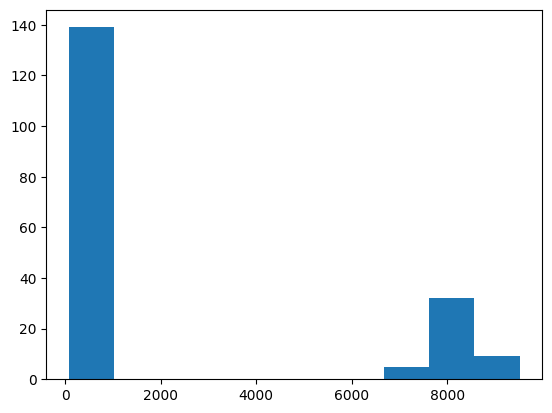




For column: Close
Summary Stats: 
count     185.000000
mean     2133.087568
std      3578.398195
min        76.275000
25%        83.025000
50%        91.075000
75%        98.075000
max      9592.500000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


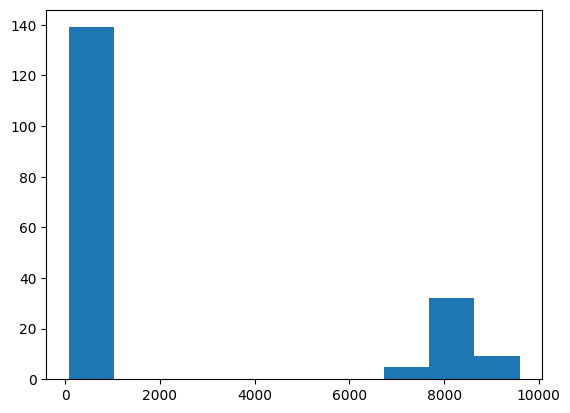




For column: Volume
Summary Stats: 
count     185.000000
mean      496.810811
std       283.941497
min        73.000000
25%       249.000000
50%       441.000000
75%       722.000000
max      1227.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


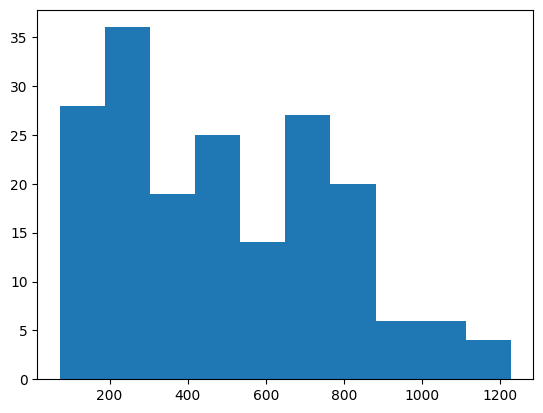




For column: Open Interest
Summary Stats: 
count     185.000000
mean     4190.810811
std      2051.401555
min       875.000000
25%      2503.000000
50%      3826.000000
75%      5908.000000
max      8706.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


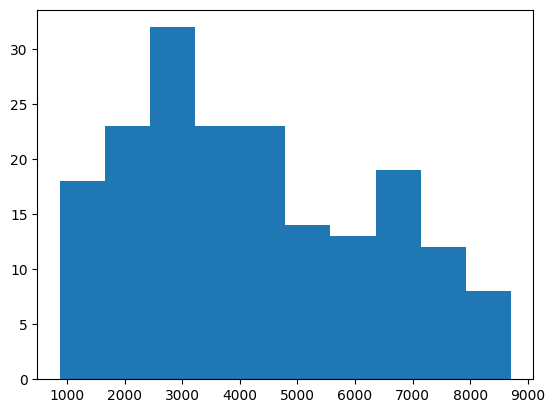




Ticker: FUT9

For column: Open
Summary Stats: 
count      158.000000
mean      9241.773576
std      24868.912373
min         77.600000
25%         83.018750
50%         90.087500
75%         95.043750
max      82600.000000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


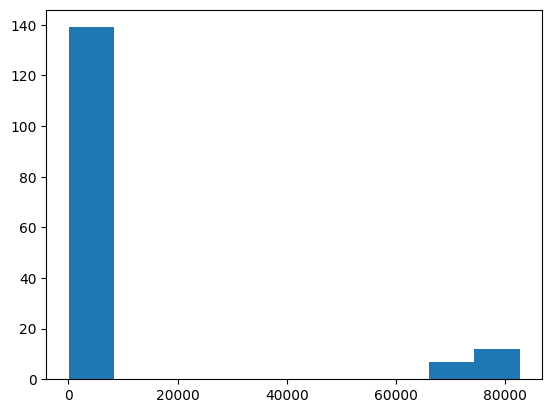




For column: High
Summary Stats: 
count      158.000000
mean      9432.398233
std      24905.038299
min         77.825000
25%         83.693750
50%         90.800000
75%         95.487500
max      82950.000000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


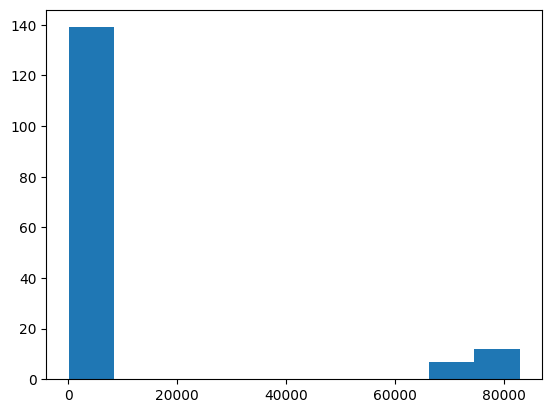




For column: Low
Summary Stats: 
count      158.000000
mean      9226.776741
std      24828.883372
min         76.975000
25%         82.556250
50%         89.650000
75%         94.743750
max      82575.000000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


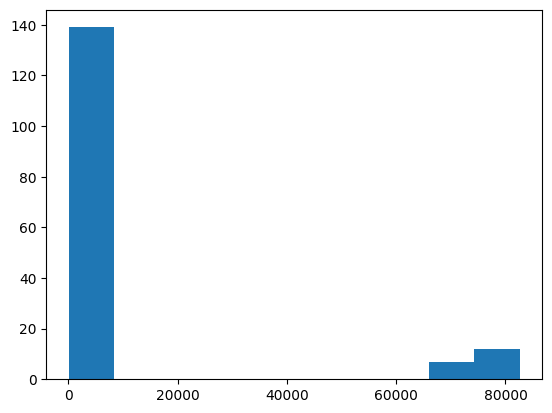




For column: Close
Summary Stats: 
count      158.000000
mean      9259.423734
std      24915.308242
min         77.425000
25%         82.925000
50%         90.400000
75%         95.081250
max      82950.000000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


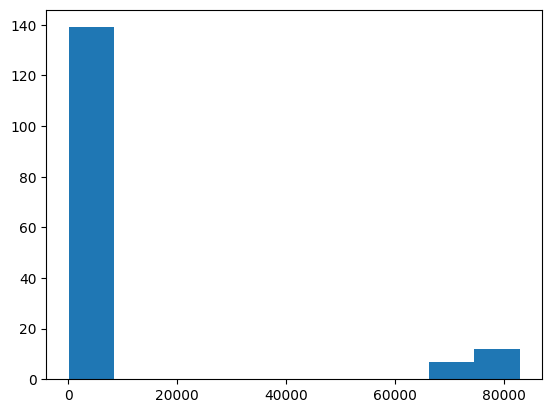




For column: Volume
Summary Stats: 
count    158.000000
mean     123.018987
std       81.613933
min       23.000000
25%       62.000000
50%      100.000000
75%      163.750000
max      428.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


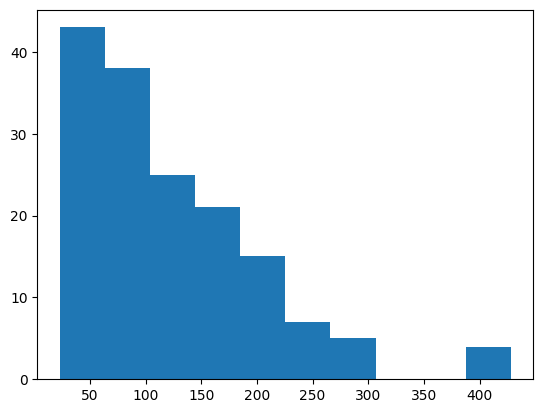




For column: Open Interest
Summary Stats: 
count     158.000000
mean     1271.417722
std       552.497805
min       418.000000
25%       799.000000
50%      1092.500000
75%      1756.750000
max      2605.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


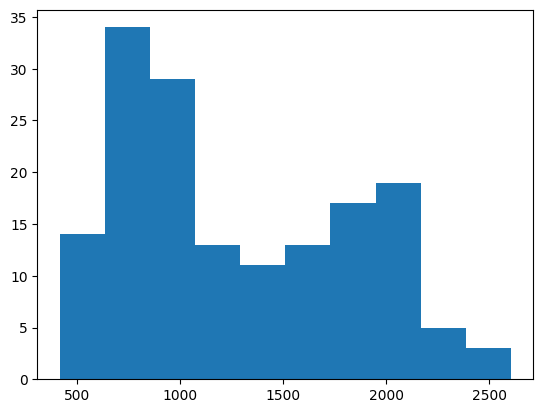




Ticker: FUT10

For column: Open
Summary Stats: 
count    81.000000
mean     86.125617
std       7.410681
min      75.500000
25%      80.025000
50%      83.675000
75%      93.650000
max      96.150000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


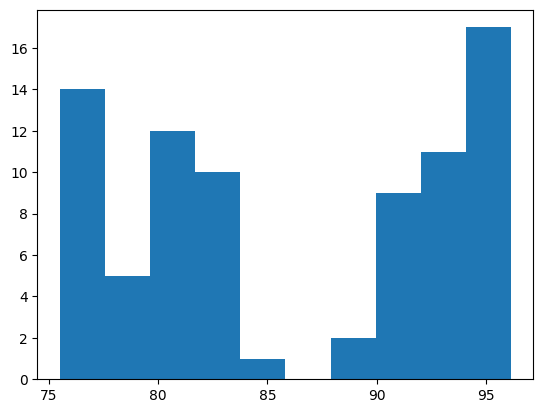




For column: High
Summary Stats: 
count    81.000000
mean     86.372531
std       7.396006
min      75.750000
25%      80.300000
50%      83.825000
75%      93.800000
max      96.300000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


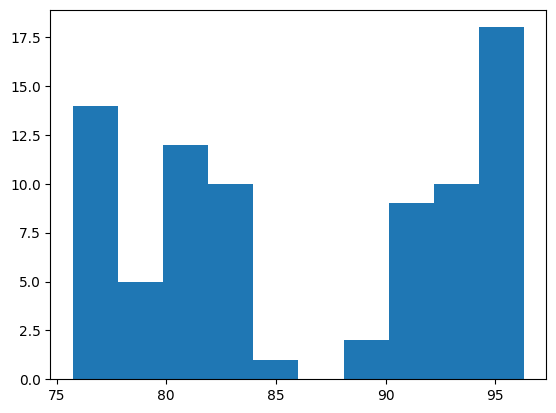




For column: Low
Summary Stats: 
count    81.000000
mean     85.929938
std       7.443374
min      75.275000
25%      80.000000
50%      83.675000
75%      93.500000
max      96.125000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


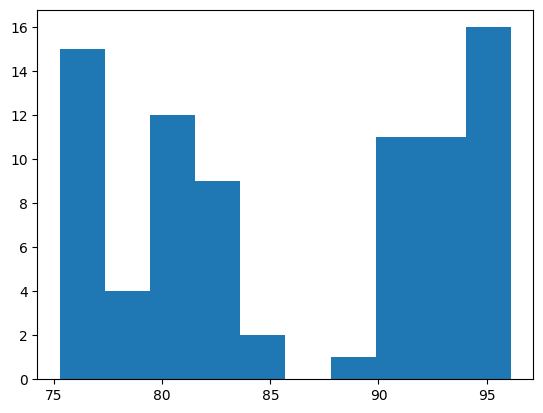




For column: Close
Summary Stats: 
count    81.000000
mean     86.173765
std       7.433663
min      75.600000
25%      80.025000
50%      83.825000
75%      93.500000
max      96.300000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


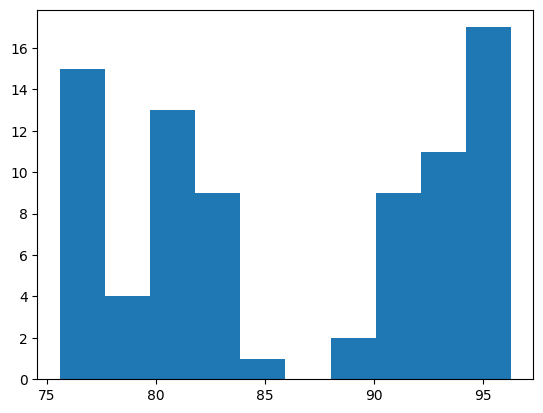




For column: Volume
Summary Stats: 
count     81.000000
mean      35.382716
std       31.045760
min        2.000000
25%       10.000000
50%       27.000000
75%       48.000000
max      145.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


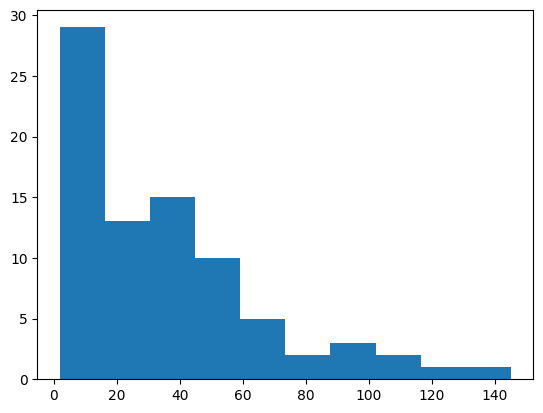




For column: Open Interest
Summary Stats: 
count      81.000000
mean      347.135802
std       219.439499
min        33.000000
25%       213.000000
50%       279.000000
75%       464.000000
max      1017.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


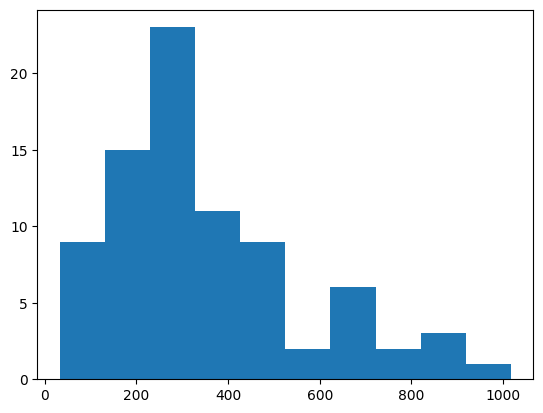




Ticker: FUT11

For column: Open
Summary Stats: 
count    18.000000
mean     91.611111
std       6.053841
min      80.125000
25%      90.593750
50%      93.587500
75%      94.887500
max      99.750000
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


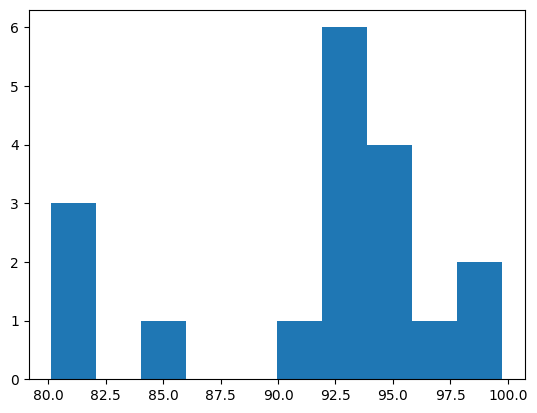




For column: High
Summary Stats: 
count     18.000000
mean      91.729167
std        6.049600
min       80.350000
25%       90.631250
50%       93.875000
75%       94.887500
max      100.100000
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


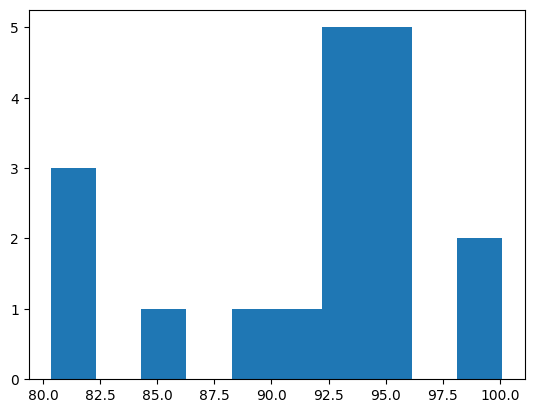




For column: Low
Summary Stats: 
count    18.000000
mean     91.398611
std       6.011548
min      79.500000
25%      90.543750
50%      93.500000
75%      94.312500
max      99.150000
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


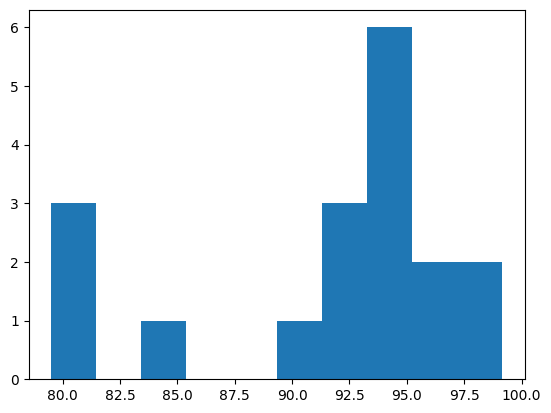




For column: Close
Summary Stats: 
count    18.000000
mean     91.512500
std       6.052492
min      79.500000
25%      90.543750
50%      93.662500
75%      94.650000
max      99.150000
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


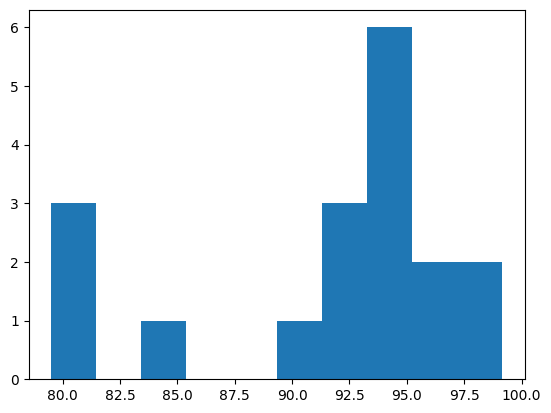




For column: Volume
Summary Stats: 
count    18.000000
mean     20.944444
std      18.299702
min       2.000000
25%       5.250000
50%      18.000000
75%      32.500000
max      71.000000
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


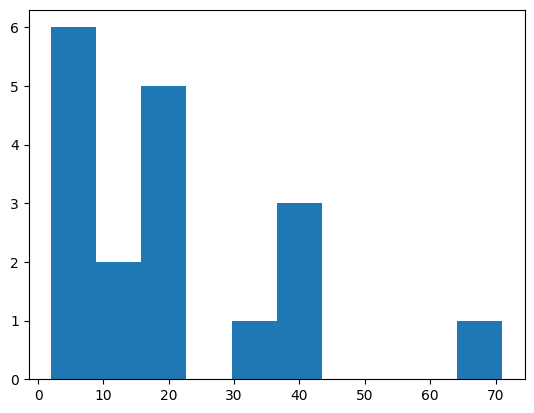




For column: Open Interest
Summary Stats: 
count     18.000000
mean     117.888889
std      145.991897
min       17.000000
25%       33.500000
50%       80.000000
75%      119.500000
max      537.000000
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


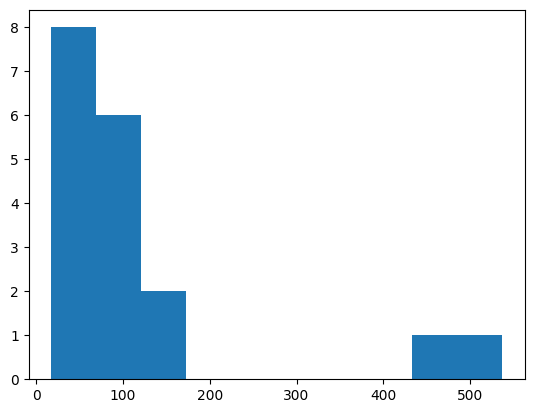




Ticker: FUT12

For column: Open
Summary Stats: 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Open, dtype: float64


Missingness: 
0.0


Histogram:


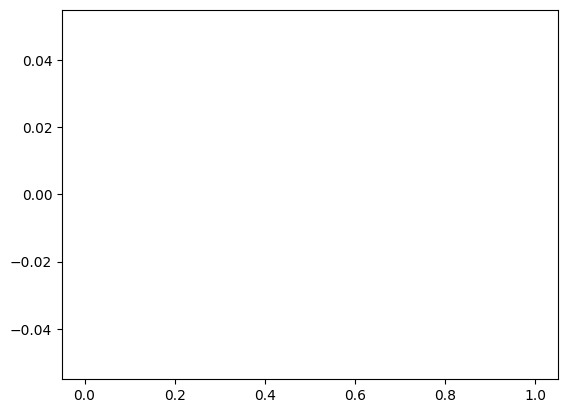




For column: High
Summary Stats: 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: High, dtype: float64


Missingness: 
0.0


Histogram:


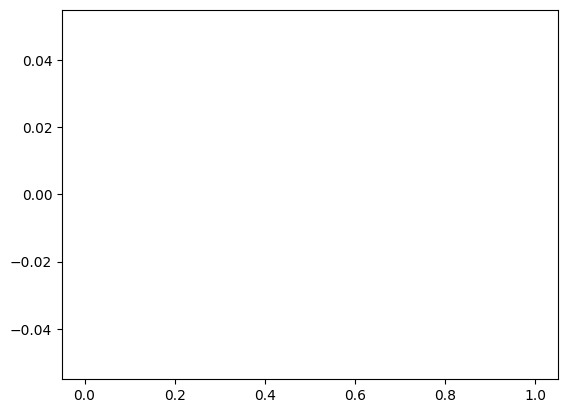




For column: Low
Summary Stats: 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Low, dtype: float64


Missingness: 
0.0


Histogram:


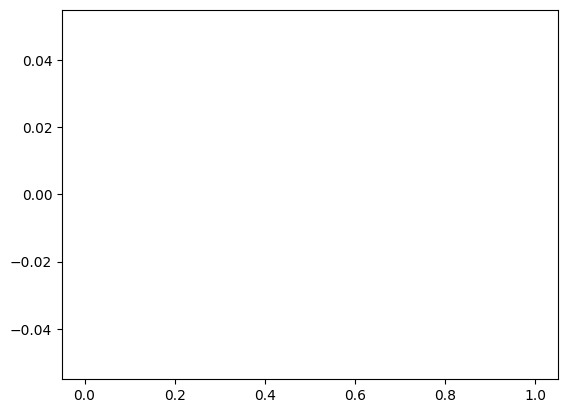




For column: Close
Summary Stats: 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


Missingness: 
0.0


Histogram:


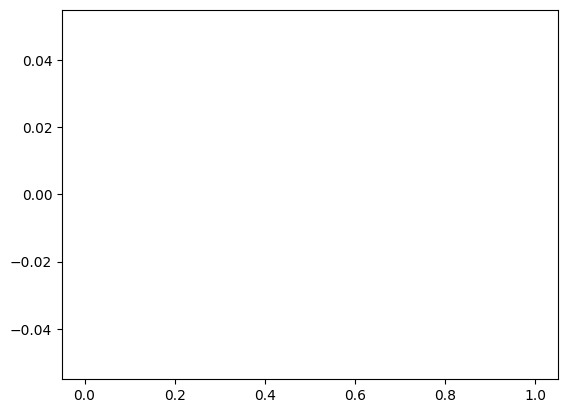




For column: Volume
Summary Stats: 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Volume, dtype: float64


Missingness: 
0.0


Histogram:


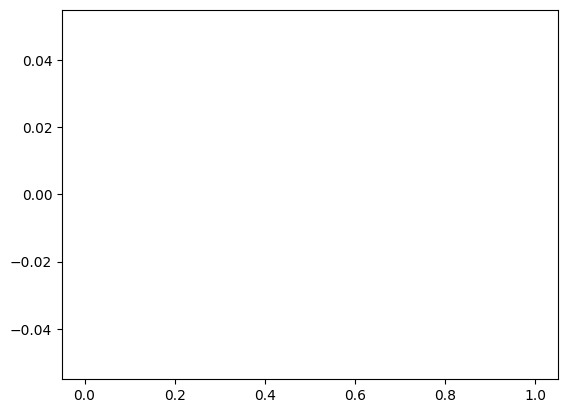




For column: Open Interest
Summary Stats: 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Open Interest, dtype: float64


Missingness: 
0.0


Histogram:


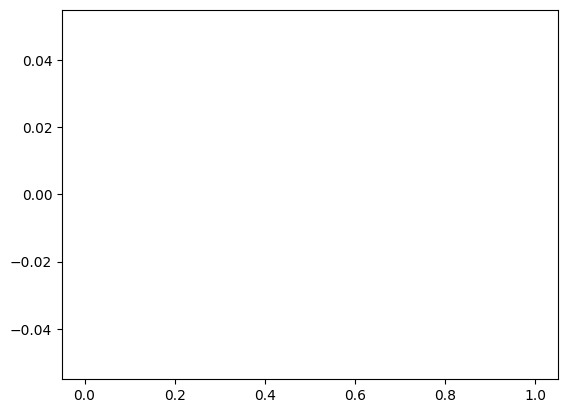

### Data Imputation Appropriateness and Strategies


 Imputations (through central tendency statistics, grouped measures etc.), backfills, forwardfills are viable strategies but for financial data, especially for `Open`, `Close`, `Low`, `High` readings, it is **strongly discouraged** to impute values for securities like Options/Futures that are very volatile (even at intra-day) so **gaps may have to be an undesirable compromise** to prevent fatal factual inaccuracies.


 **forward/back fills** may be handy for `Close` prices over the weekend/holidays perhaps where pricing data may technically not exist.


Mitigation for `Volume` and `Open Interest` may still seem conceivable, **forward/back fills may help but I prefer using rolling means to impute over, say a 5-day window** for more "context" for a *particular* ticker being a sorted time-series.


### AI-Chaining for Incoming Data & General AI policy Adopted

While I found developer-driven (but AI *assisted*) to be a more viable and accurate option, using the OpenAI API, I created a chain to "flag/process" any incoming data driven by the helper methods I developed.

**AI Usage** I used ChatGPT for syntax checks, understanding some under-the-hood workings in pandas for better design decisions (attempting to maximize my use of vectorized df structure vs traditional loops) and would have further used Chaining/LLMs for detailed testing strategies to build on tests that I would have generally written.

**As shown in the original notebook, chains help us get summary_stats, histogram etc. information right of the bat for some quick EDA and flagging.**



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Assuming df is already defined\n\n# 1. Describe the distribution of data for all columns\nsummary = df.describe(include='all')\n\n# 2. Create histograms for numeric data\nnumeric_columns = df.select_dtypes(include=[np.number]).columns\n\nplt.figure(figsize=(15, 10))\nfor i, col in enumerate(numeric_columns, 1):\n    plt.subplot(2, 3, i)\n    sns.histplot(df[col], bins=30, kde=True)\n    plt.title(f'Histogram of {col}')\nplt.tight_layout()\nplt.show()\n\n# 3. Indicate the ranges at which outliers exist for each numerical column\noutlier_ranges = {}\nfor col in numeric_columns:\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    outlier_ranges[col] = (lower_bound, upper_bound)\n\nsummary, outlier_ran

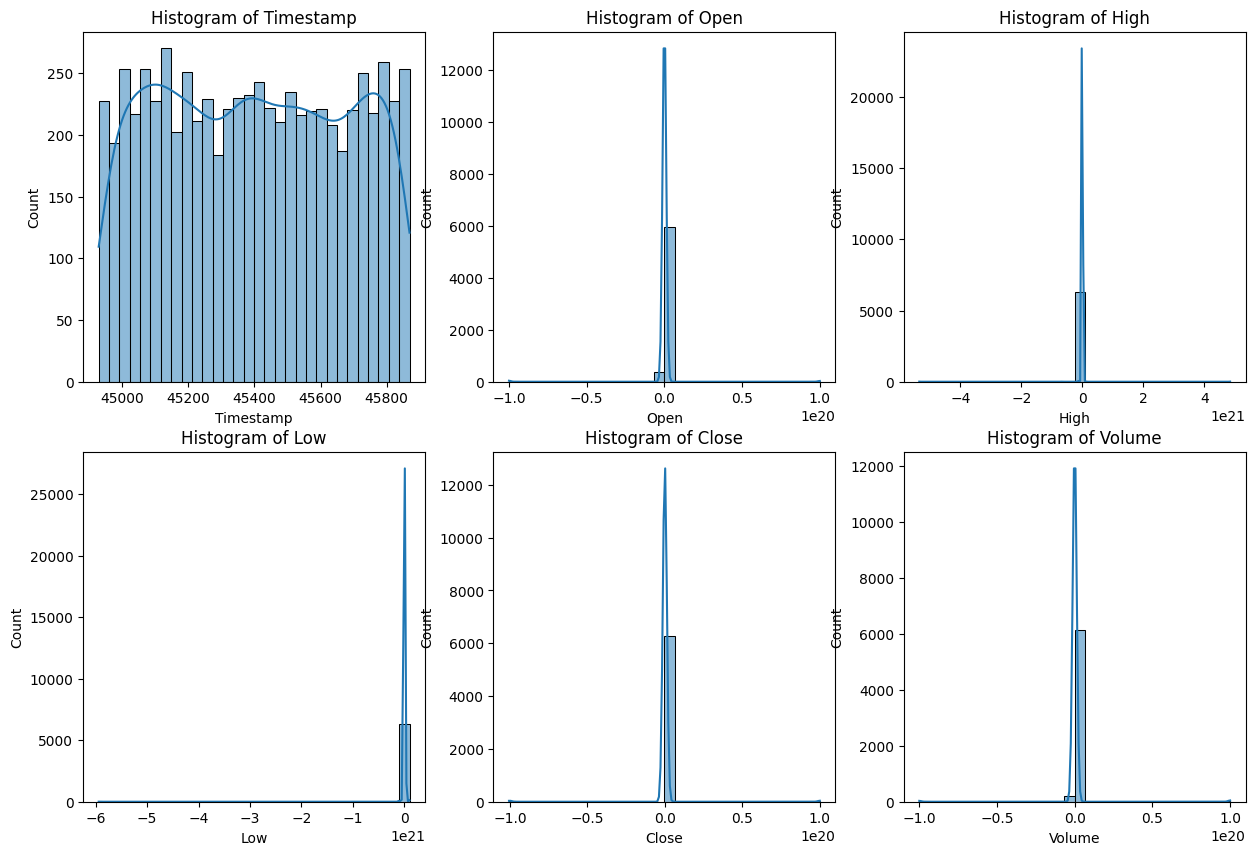

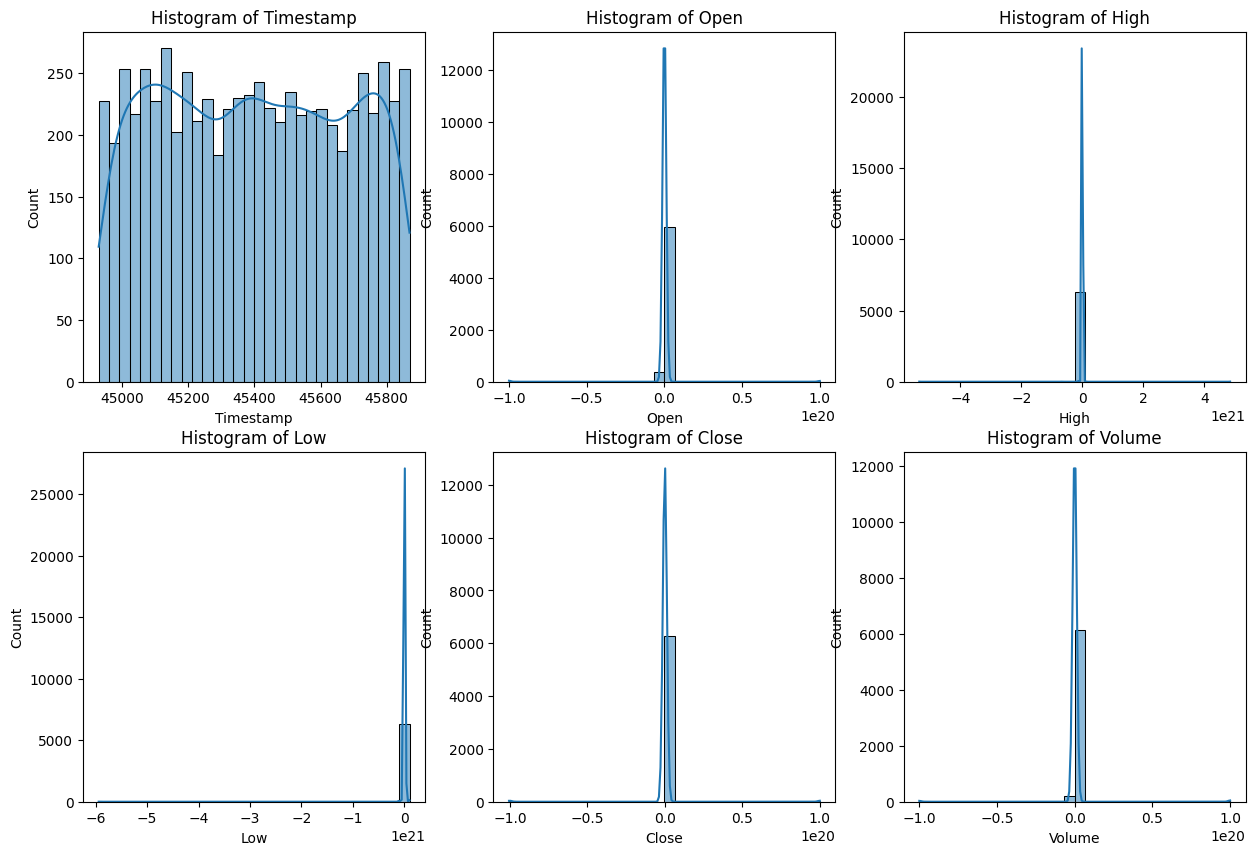

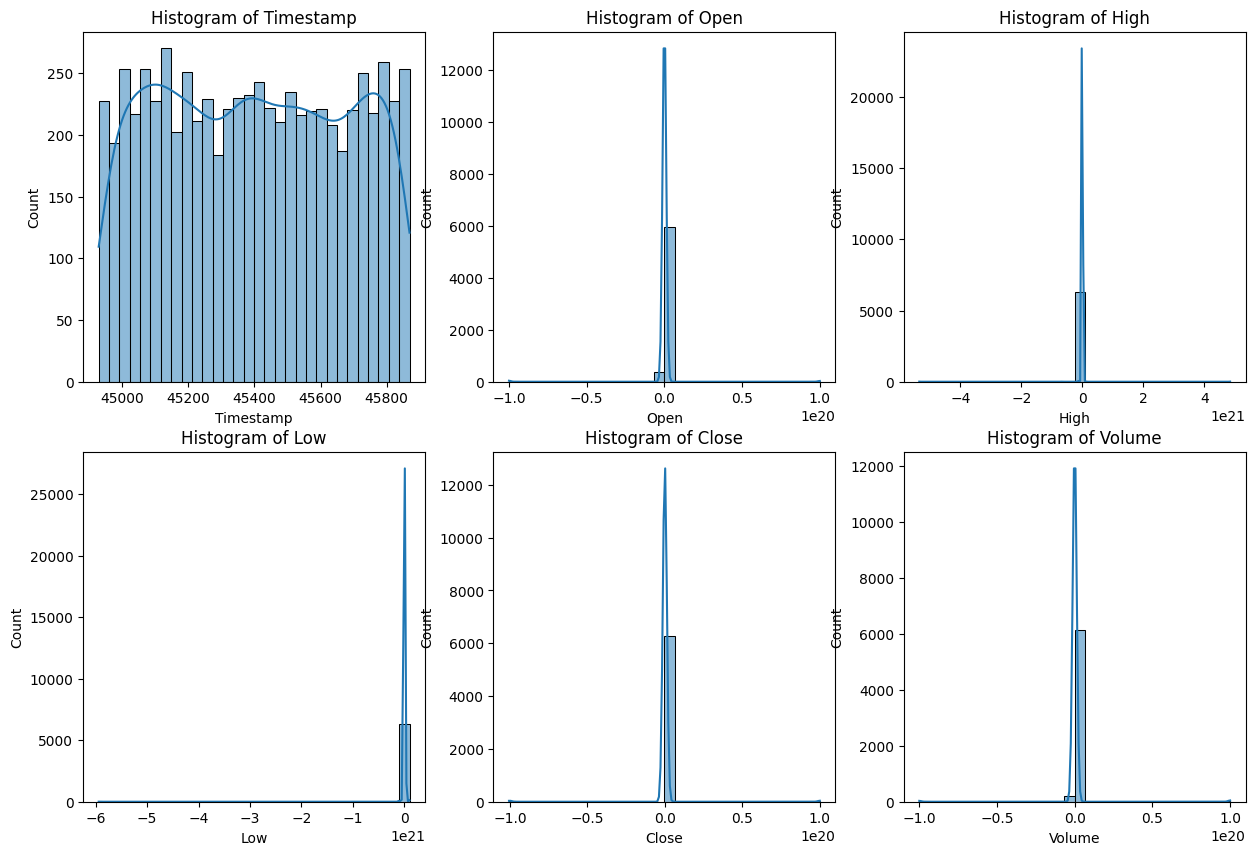

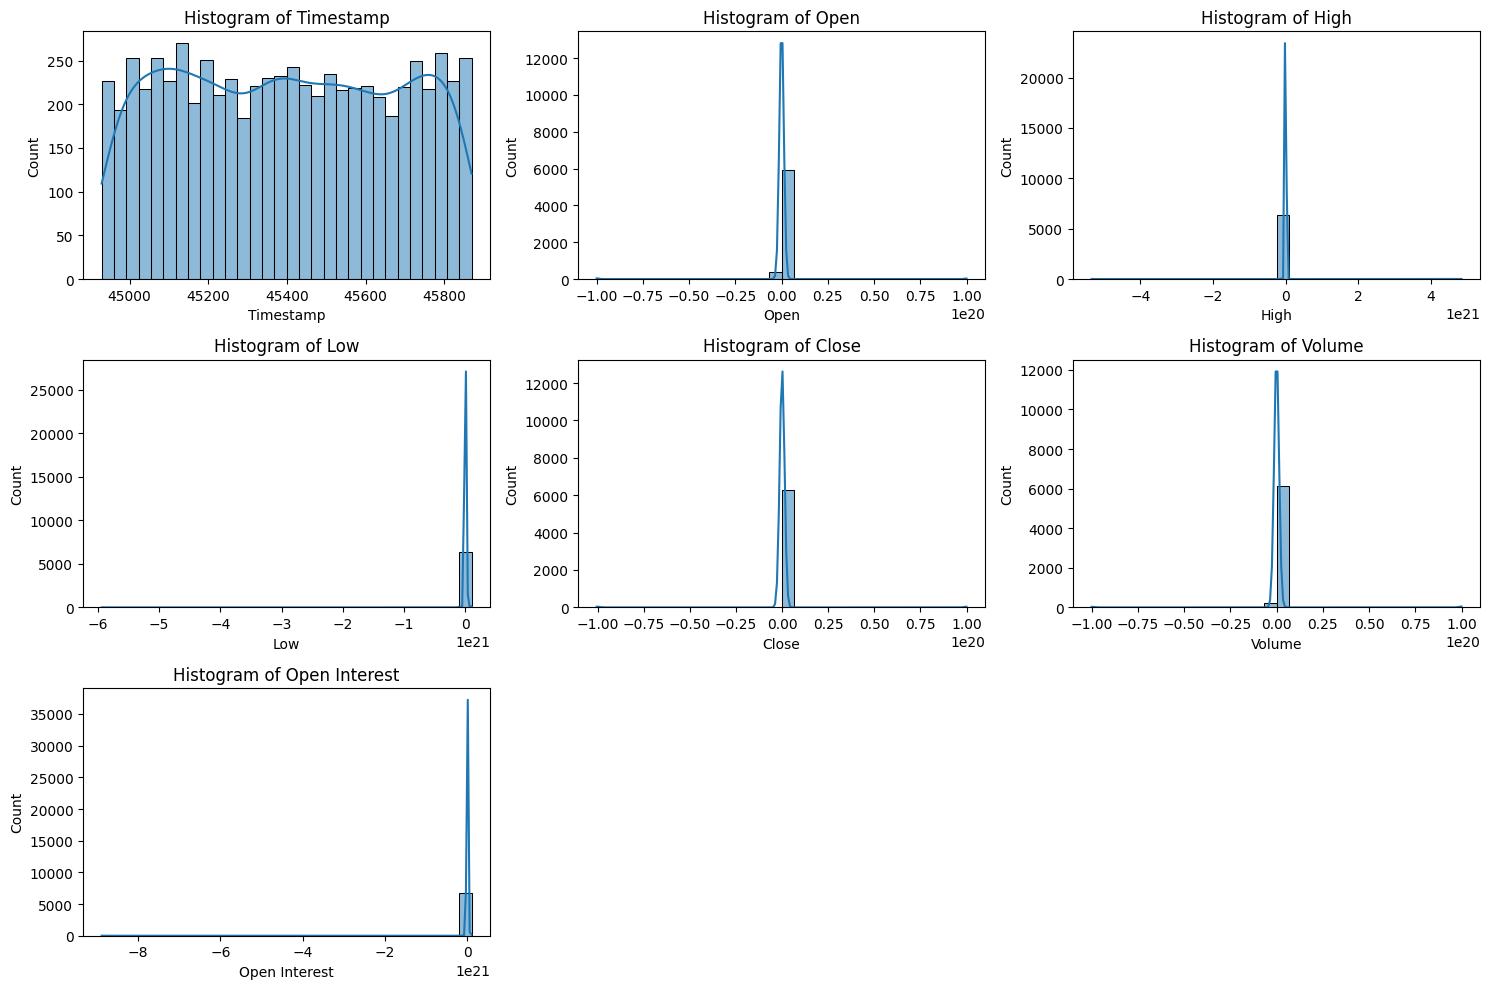

(       Symbol     Timestamp          Open          High           Low  \
count    7450   6788.000000  6.325000e+03  6.325000e+03  6.325000e+03   
unique     12           NaN           NaN           NaN           NaN   
top      FUT1           NaN           NaN           NaN           NaN   
freq      647           NaN           NaN           NaN           NaN   
mean      NaN  45399.400707 -6.325537e+16 -3.171391e+17 -1.484146e+18   
min       NaN  44929.000000 -1.000000e+20 -5.345185e+21 -5.940167e+21   
25%       NaN  45156.000000  8.020000e+01  8.047500e+01  7.950000e+01   
50%       NaN  45398.000000  8.947500e+01  9.000000e+01  8.910000e+01   
75%       NaN  45637.000000  1.001000e+02  1.008500e+02  9.977500e+01   
max       NaN  45869.000000  1.000000e+20  4.843482e+21  1.000000e+20   
std       NaN    273.809411  6.887259e+18  9.137840e+19  9.144227e+19   

               Close        Volume  Open Interest  \
count   6.325000e+03  6.392000e+03   6.705000e+03   
unique          

{'input': '\n\nCan you do the following?\n\n1. Explain the distribution of data for all columns.\n2. You can create histograms for numeric data.\n3. Indicate the ranges at which outliers exist for each numerical column\n\nYou do not need to output step-wise reasoning, prose or action inputs. You can simply output response text to the questions above or\ndisplay plots.\n\n',
 'output': "### Data Distribution Summary\n- **Symbol**: Categorical variable with 12 unique values, most frequent is 'FUT1'.\n- **Timestamp**: Numeric variable with a range from 44929 to 45869.\n- **Open**: Numeric variable with a mean of approximately -6.33e+16, ranging from -1.00e+20 to 1.00e+20.\n- **High**: Numeric variable with a mean of approximately -3.17e+17, ranging from -5.34e+21 to 4.84e+21.\n- **Low**: Numeric variable with a mean of approximately -1.48e+18, ranging from -5.94e+21 to 1.00e+20.\n- **Close**: Numeric variable with a mean of approximately -1.12e+14, ranging from -1.01e+20 to 1.00e+20.\n- *

In [ ]:
prompts = """

1) Explain the distribution of data for all columns.
2) You can create histograms for numeric data.
3) Indicate the ranges at which outliers exist for each numerical column

You do not need to output step-wise reasoning, prose or action inputs. You can simply output response text to the questions above or
display plots.

"""
agent.invoke(prompts)

### Bonus Content


After processing each ticker, using some domain knowledge tracking 20-day Moving Averages & Exponential Moving Averages heled "smooth" out line-plot price action for each ticker. Helper methods helped track MA & EMA and calculate cumulative Rate of Return and General Volatility for a ticker such as `FUT1`


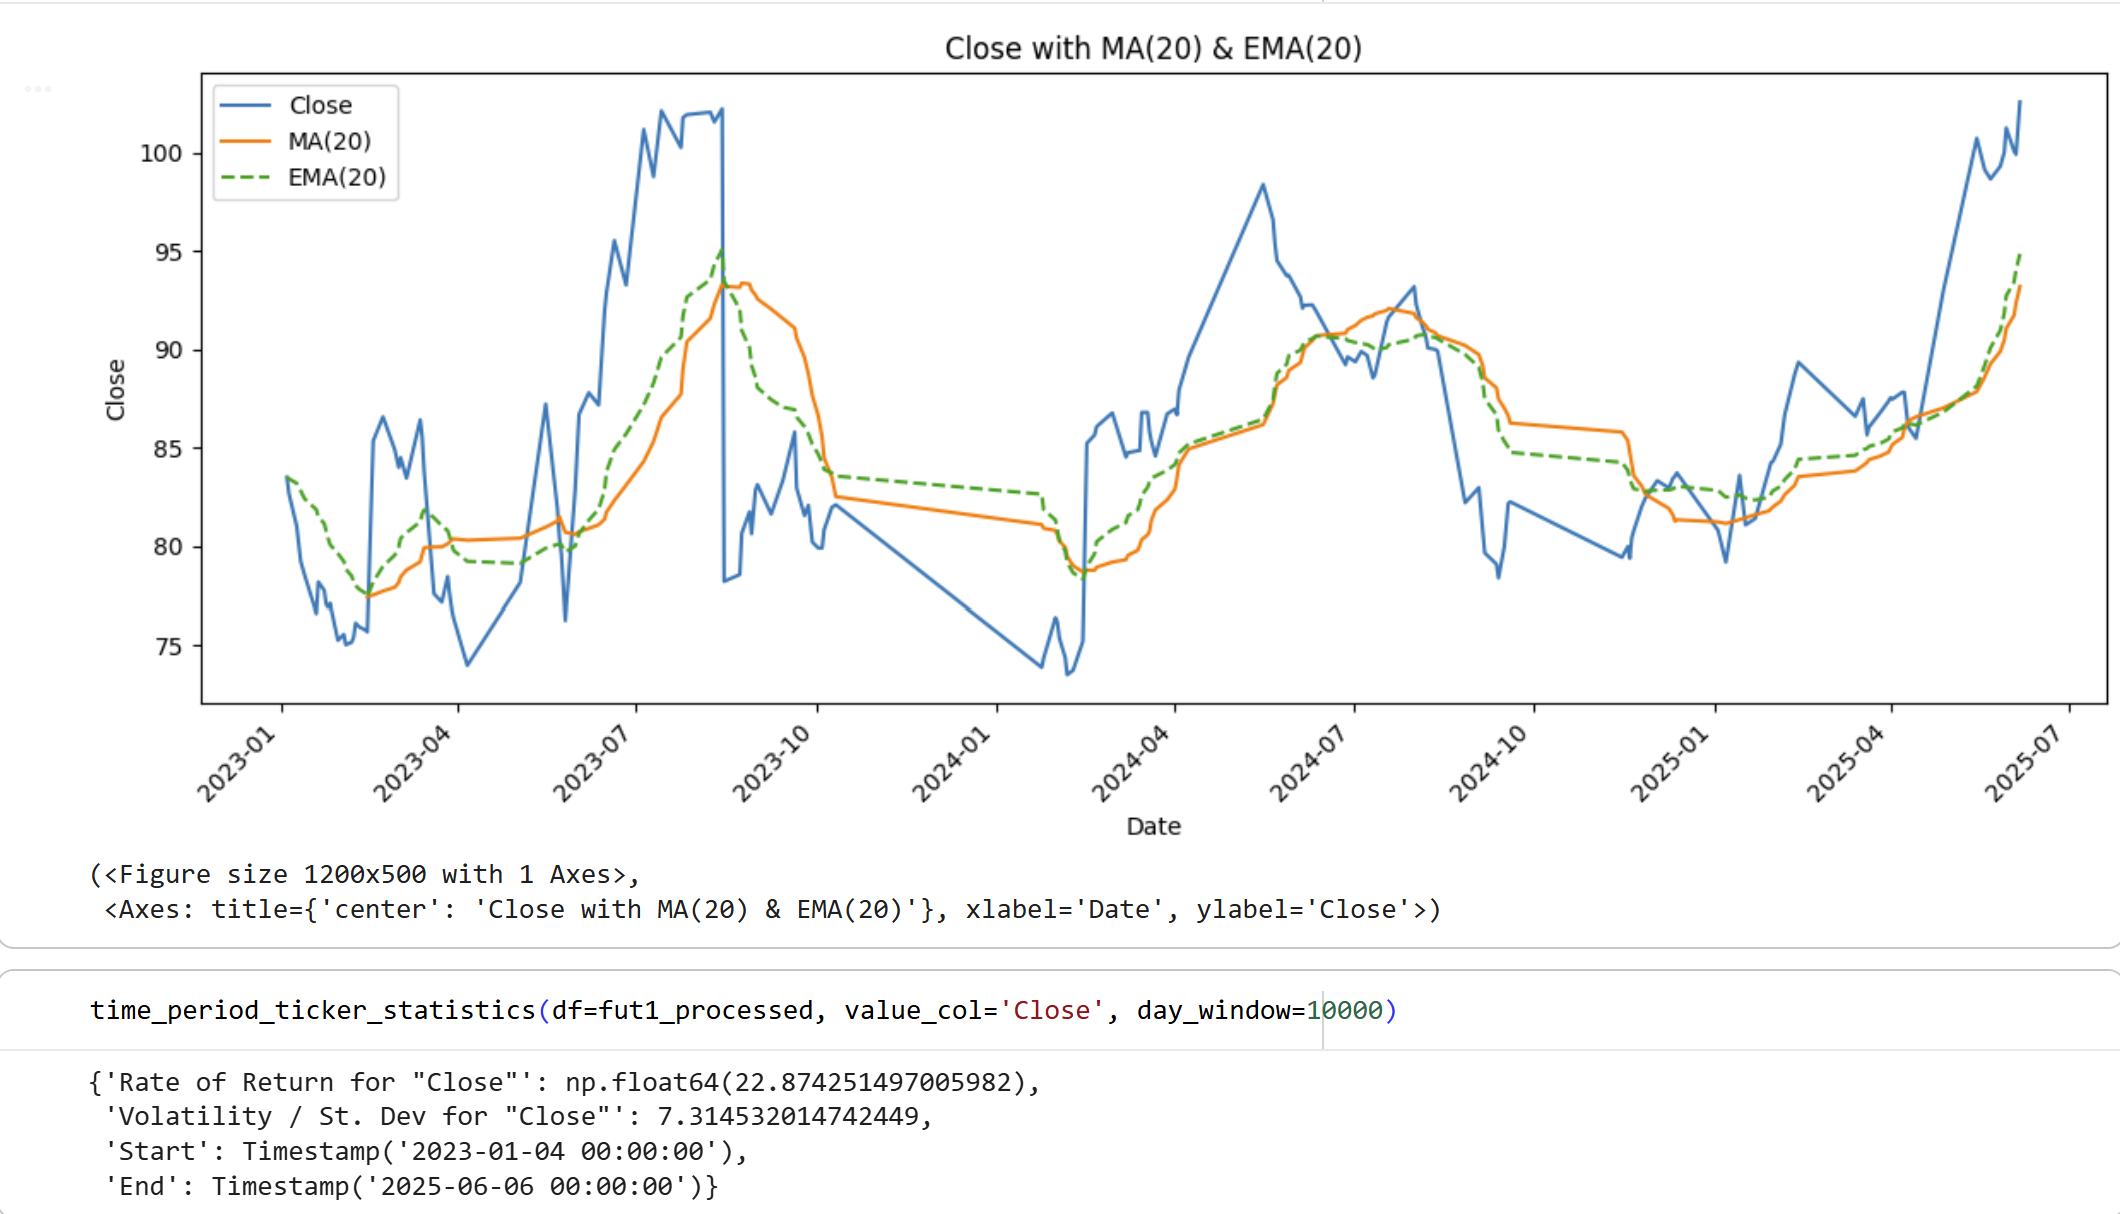

Though out of scope, this would probably have been an interesting exercise to judge relative performance for each ticker but I feel this would be more of a dedicated downstream effort.